# "Pandas 100 tricks"
> "Collection of useful pandas tricks"
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [pandas, jupyter]
- image: images/python/pandas_tricks.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

# Welcome to this Kernel

* This kernel is a compilation of tricks of pandas tricks


<a id = "Imports"></a>
# Importing libraries and setting some helper functions
[Go back to the Table of Contents](#table_of_contents)

In [1]:
# basic libraries
import os
import numpy as np
import pandas as pd

# this will allow us to print all the files as we generate more in the kernel
def print_files():
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

# check Trick 91 for an example
def generate_sample_data(): # creates a fake df for testing
    number_or_rows = 20
    num_cols = 7
    cols = list("ABCDEFG")
    df = pd.DataFrame(np.random.randint(1, 20, size = (number_or_rows, num_cols)), columns=cols)
    df.index = pd.util.testing.makeIntIndex(number_or_rows)
    return df

# check Trick 91 for an example
def generate_sample_data_datetime(): # creates a fake df for testing
    number_or_rows = 365*24
    num_cols = 2
    cols = ["sales", "customers"]
    df = pd.DataFrame(np.random.randint(1, 20, size = (number_or_rows, num_cols)), columns=cols)
    df.index = pd.util.testing.makeDateIndex(number_or_rows, freq="H")
    return df

# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print_files()

<a id = "trick100"></a>
# Trick 100: Loading sample of big data
[Go back to the Table of Contents](#table_of_contents)

In [2]:
df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_Dec19.csv")
print("The shape of the df is {}".format(df.shape))

del df

df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_Dec19.csv", skiprows = lambda x: x>0 and np.random.rand() > 0.01)
print("The shape of the df is {}. It has been reduced 10 times!".format(df.shape))


'''
How it works:
skiprows accepts a function that is evaluated against the integer index.
x > 0 makes sure that the headers is not skipped
np.random.rand() > 0.01 returns True 99% of the tie, thus skipping 99% of the time.
Note that we are using skiprows
'''

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/us-accidents/US_Accidents_Dec19.csv'

<a id = "trick99"></a>
# Trick 99: How to avoid Unnamed: 0 columns
[Go back to the Table of Contents](#table_of_contents)

In [3]:
d = {\
"zip_code": [12345, 56789, 101112, 131415],
"factory": [100, 400, 500, 600],
"warehouse": [200, 300, 400, 500],
"retail": [1, 2, 3, 4]
}

df = pd.DataFrame(d)
df

# save to csv
df.to_csv("trick99data.csv")

df = pd.read_csv("trick99data.csv")
df
# To avoid Unnamed: 0

df = pd.read_csv("trick99data.csv", index_col=0)
# or when saving df = pd.read_csv("trick99data.csv", index = False)
df

,zip_code,factory,warehouse,retail
0,12345,100,200,1
1,56789,400,300,2
2,101112,500,400,3
3,131415,600,500,4


,Unnamed: 0,zip_code,factory,warehouse,retail
0,0,12345,100,200,1
1,1,56789,400,300,2
2,2,101112,500,400,3
3,3,131415,600,500,4


,zip_code,factory,warehouse,retail
0,12345,100,200,1
1,56789,400,300,2
2,101112,500,400,3
3,131415,600,500,4


<a id = "trick98"></a>
# Trick 98: Convert a wide DF into a long one
[Go back to the Table of Contents](#table_of_contents)

In [4]:
d = {\
"zip_code": [12345, 56789, 101112, 131415],
"factory": [100, 400, 500, 600],
"warehouse": [200, 300, 400, 500],
"retail": [1, 2, 3, 4]
}

df = pd.DataFrame(d)
df

# we have to reassing

# location_type is generated automatically from the columns left after specifying id_vars (you can pass a list also)
df = df.melt(id_vars = "zip_code", var_name = "location_type", value_name = "distance")
df

,zip_code,factory,warehouse,retail
0,12345,100,200,1
1,56789,400,300,2
2,101112,500,400,3
3,131415,600,500,4


,zip_code,location_type,distance
0,12345,factory,100
1,56789,factory,400
2,101112,factory,500
3,131415,factory,600
4,12345,warehouse,200
5,56789,warehouse,300
6,101112,warehouse,400
7,131415,warehouse,500
8,12345,retail,1
9,56789,retail,2


<a id = "trick97"></a>
# Trick 97: Convert year and day of year into a single datetime column
[Go back to the Table of Contents](#table_of_contents)

In [5]:
# Trick 97
# Convert
d = {\
"year": [2019, 2019, 2020],
"day_of_year": [350, 365, 1]
}

df = pd.DataFrame(d)
df

# Step 1: create a combined column
df["combined"] = df["year"]*1000 + df["day_of_year"]
df

# Step 2: convert to datetime
df["date"] = pd.to_datetime(df["combined"], format = "%Y%j")
df

,year,day_of_year
0,2019,350
1,2019,365
2,2020,1


,year,day_of_year,combined
0,2019,350,2019350
1,2019,365,2019365
2,2020,1,2020001


,year,day_of_year,combined,date
0,2019,350,2019350,2019-12-16
1,2019,365,2019365,2019-12-31
2,2020,1,2020001,2020-01-01


<a id = "trick96"></a>
# Trick 96: Interactive plots out of the box in pandas
[Go back to the Table of Contents](#table_of_contents)

In [6]:
print(pd.__version__)
# Pandas version 0.25 or higher requiered and you need hvplot

import pandas as pd
df = pd.read_csv("../input/drinks-by-country/drinksbycountry.csv")
df

# this one is not interactve
df.plot(kind = "scatter", x = "spirit_servings", y = "wine_servings")

# run !pip install hvplot
#pd.options.plotting.backend = "hvplot"
#df.plot(kind = "scatter", x = "spirit_servings", y = "wine_servings", c = "continent")

1.4.2


FileNotFoundError: [Errno 2] No such file or directory: '../input/drinks-by-country/drinksbycountry.csv'

<a id = "trick95"></a>
# Trick 95: Count the missing values
[Go back to the Table of Contents](#table_of_contents)

In [7]:
d = {\
"col1": [2019, 2019, 2020],
"col2": [350, 365, 1],
"col3": [np.nan, 365, None]
}

df = pd.DataFrame(d)
df

# Solution 1
df.isnull().sum().sum()

# Solution 2
df.isna().sum()

# Solution 3
df.isna().any()

# Solution 4:
df.isna().any(axis = None)

,col1,col2,col3
0,2019,350,NaN
1,2019,365,365.0
2,2020,1,NaN


2

col1    0
col2    0
col3    2
dtype: int64

col1    False
col2    False
col3     True
dtype: bool

True

<a id = "trick94"></a>
# Trick 94: Save memory by fixing your date
[Go back to the Table of Contents](#table_of_contents)

In [8]:
df = pd.read_csv("../input/titanic/train.csv", usecols = ["Pclass", "Sex", "Parch", "Cabin"])
df

# let's see how much our df occupies in memory
df.memory_usage(deep = True)

# convert to smaller datatypes
df = df.astype({"Pclass":"int8",
                "Sex":"category", 
                "Parch": "Sparse[int]", # most values are 0
                "Cabin":"Sparse[str]"}) # most values are NaN

df.memory_usage(deep = True)

FileNotFoundError: [Errno 2] No such file or directory: '../input/titanic/train.csv'

<a id = "trick93"></a>
# Trick 93: Combine the small categories into a single category named "Others" (using frequencies)
[Go back to the Table of Contents](#table_of_contents)

In [9]:
d = {"genre": ["A", "A", "A", "A", "A", "B", "B", "C", "D", "E", "F"]}
df = pd.DataFrame(d)
df

# Step 1: count the frequencies
frequencies = df["genre"].value_counts(normalize = True)
frequencies

# Step 2: establish your threshold and filter the smaller categories
threshold = 0.1
small_categories = frequencies[frequencies < threshold].index
small_categories

# Step 3: replace the values
df["genre"] = df["genre"].replace(small_categories, "Other")
df["genre"].value_counts(normalize = True)

,genre
0,A
1,A
2,A
3,A
4,A
5,B
6,B
7,C
8,D
9,E


A    0.454545
B    0.181818
C    0.090909
D    0.090909
E    0.090909
F    0.090909
Name: genre, dtype: float64

Index(['C', 'D', 'E', 'F'], dtype='object')

A        0.454545
Other    0.363636
B        0.181818
Name: genre, dtype: float64

<a id = "trick92"></a>
# Trick 92: Clean Object column with mixed data using regex
[Go back to the Table of Contents](#table_of_contents)

In [10]:
d = {"customer": ["A", "B", "C", "D"], "sales":[1100, 950.75, "$400", "$1250.35"]}
df = pd.DataFrame(d)
df

# Step 1: check the data types
df["sales"].apply(type)

# Step 2: use regex
df["sales"] = df["sales"].replace("[$,]", "", regex = True).astype("float")
df
df["sales"].apply(type)

,customer,sales
0,A,1100
1,B,950.75
2,C,$400
3,D,$1250.35


0      <class 'int'>
1    <class 'float'>
2      <class 'str'>
3      <class 'str'>
Name: sales, dtype: object

,customer,sales
0,A,1100.00
1,B,950.75
2,C,400.00
3,D,1250.35


0    <class 'float'>
1    <class 'float'>
2    <class 'float'>
3    <class 'float'>
Name: sales, dtype: object

<a id = "trick91"></a>
# Trick 91: Creating a time series dataset for testing
[Go back to the Table of Contents](#table_of_contents)

In [11]:
# Solution 1
number_or_rows = 365*24 # hours in a year
pd.util.testing.makeTimeDataFrame(number_or_rows, freq="H")

# Solution 2
num_cols = 2
cols = ["sales", "customers"]
df = pd.DataFrame(np.random.randint(1, 20, size = (number_or_rows, num_cols)), columns=cols)
df.index = pd.util.testing.makeDateIndex(number_or_rows, freq="H")
df

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/pandas/util/__init__.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


,A,B,C,D
2000-01-01 00:00:00,0.453635,1.266052,1.606090,-0.672907
2000-01-01 01:00:00,0.550805,-0.301169,0.768655,-0.533324
2000-01-01 02:00:00,1.391475,0.895663,0.329174,-1.322762
2000-01-01 03:00:00,0.365093,0.793943,0.362911,1.083387
2000-01-01 04:00:00,0.767126,-0.477722,-0.152394,-0.688606
...,...,...,...,...
2000-12-30 19:00:00,-0.825149,0.944871,0.479280,-0.609567
2000-12-30 20:00:00,-0.299550,-1.363519,-0.806951,-1.187978
2000-12-30 21:00:00,0.766021,0.282138,-0.179177,2.870268
2000-12-30 22:00:00,-2.290921,-0.939690,0.332516,-1.785508


,sales,customers
2000-01-01 00:00:00,5,14
2000-01-01 01:00:00,19,5
2000-01-01 02:00:00,17,19
2000-01-01 03:00:00,15,6
2000-01-01 04:00:00,8,13
...,...,...
2000-12-30 19:00:00,18,12
2000-12-30 20:00:00,17,8
2000-12-30 21:00:00,8,18
2000-12-30 22:00:00,1,8


<a id = "trick90"></a>
# Trick 90: Moving columns to a specific location
[Go back to the Table of Contents](#table_of_contents)

In [12]:
d = {"A":[15, 20], "B":[20, 25], "C":[30 ,40], "D":[50, 60]}
df = pd.DataFrame(d)
df

# Using insert
df.insert(3, "C2", df["C"]*2)
df

# Other solution
df["C3"] = df["C"]*3 # create a new columns, it will be at the end
columns = df.columns.to_list() # create a list with all columns
location = 4 # specify the location where you want your new column
columns = columns[:location] + ["C3"] + columns[location:-1] # reaarange the list
df = df[columns] # create te dataframe in with the order of columns you like
df


,A,B,C,D
0,15,20,30,50
1,20,25,40,60


,A,B,C,C2,D
0,15,20,30,60,50
1,20,25,40,80,60


,A,B,C,C2,C3,D
0,15,20,30,60,90,50
1,20,25,40,80,120,60


<a id = "trick89"></a>
# Trick 89: Split names into first and last name
[Go back to the Table of Contents](#table_of_contents)

In [13]:
df = pd.Series(["Geordi La Forge", "Deanna Troi", "Data"]).to_frame()
df.rename({0:"names"}, inplace = True, axis = 1)
df
#                              split on first space  
df["first_name"] = df["names"].str.split(n = 1).str[0]
df["last_name"] = df["names"].str.split(n = 1).str[1]
df

,names
0,Geordi La Forge
1,Deanna Troi
2,Data


,names,first_name,last_name
0,Geordi La Forge,Geordi,La Forge
1,Deanna Troi,Deanna,Troi
2,Data,Data,NaN


<a id = "trick88"></a>
# Trick 88: Rearrange columns in a df
[Go back to the Table of Contents](#table_of_contents)

In [14]:
df = generate_sample_data()
df.head()

# Solution 1
df[["A", "C", "D", "F", "E", "G", "B"]].head() # doesn't modify in place

# Solution 2
cols_to_move = ["A", "G", "B"]

new_order = cols_to_move + [c for c in df.columns if c not in cols_to_move] # generate your new order
df[new_order].head()

# Solutin 3: using index
cols = df.columns[[0, 5 , 3, 4, 2, 1, 6]] # df.columns returns a series with index, we use the list to iorder the index as we like --> this way we order the columns
df[cols].head()


,A,B,C,D,E,F,G
0,10,15,16,6,9,11,5
1,6,15,4,14,17,19,15
2,10,10,2,13,19,11,13
3,3,7,7,19,16,13,7
4,16,9,8,6,3,3,13


,A,C,D,F,E,G,B
0,10,16,6,11,9,5,15
1,6,4,14,19,17,15,15
2,10,2,13,11,19,13,10
3,3,7,19,13,16,7,7
4,16,8,6,3,3,13,9


,A,G,B,C,D,E,F
0,10,5,15,16,6,9,11
1,6,15,15,4,14,17,19
2,10,13,10,2,13,19,11
3,3,7,7,7,19,16,13
4,16,13,9,8,6,3,3


,A,F,D,E,C,B,G
0,10,11,6,9,16,15,5
1,6,19,14,17,4,15,15
2,10,11,13,19,2,10,13
3,3,13,19,16,7,7,7
4,16,3,6,3,8,9,13


<a id = "trick87"></a>
# Trick 87: Aggregate you datetime by by and filter weekends
[Go back to the Table of Contents](#table_of_contents)

In [15]:
df = generate_sample_data_datetime()
df.shape
df.head()

# Step 1: resample by D. Basically agregate by day and use to_frame() to convert it to frame
daily_sales = df.resample("D")["sales"].sum().to_frame()
daily_sales

# Step 2: filter weekends
weekends_sales = daily_sales[daily_sales.index.dayofweek.isin([5, 6])]
weekends_sales

'''
dayofweek day
0         Monday
1         Tuesday
2         Wednesday
3         Thursday
4         Friday
5         Saturday
6         Sunday
'''

(8760, 2)

,sales,customers
2000-01-01 00:00:00,6,10
2000-01-01 01:00:00,10,2
2000-01-01 02:00:00,10,5
2000-01-01 03:00:00,15,10
2000-01-01 04:00:00,1,18


,sales
2000-01-01,233
2000-01-02,293
2000-01-03,213
2000-01-04,251
2000-01-05,236
...,...
2000-12-26,238
2000-12-27,261
2000-12-28,250
2000-12-29,257


,sales
2000-01-01,233
2000-01-02,293
2000-01-08,286
2000-01-09,243
2000-01-15,253
...,...
2000-12-16,224
2000-12-17,244
2000-12-23,240
2000-12-24,269


'\ndayofweek day\n0         Monday\n1         Tuesday\n2         Wednesday\n3         Thursday\n4         Friday\n5         Saturday\n6         Sunday\n'

<a id = "trick86"></a>
# Trick 86: Named aggregations - avoids multiindex
[Go back to the Table of Contents](#table_of_contents)

In [16]:
print_files()

df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

# Problem 1
print("The Problem relies on that we don't know the column name")
df.groupby("Pclass")["Age"].agg(["mean", "max"])

# Problem 2
print("The Problem relies on that we have multiindex")
df.groupby("Pclass").agg({"Age":["mean", "max"]})

# Solution new in pandas 0.25 and higher
print("Now we have solved the previous problems by specifyig the column final name we want.")
print("BUT IT ONLY WORKS WITH A COLUMN. TO THIS KIND OF OPERATIONS ON MULTIPLE COLUMNS CHECK THE NEXT CELL")
df.groupby("Pclass")["Age"].agg(age_mean = "mean", age_max = "max")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/titanic/train.csv'

<a id = "trick86bis"></a>
# Trick 86bis: Named aggregations on multiple columns- avoids multiindex
[Go back to the Table of Contents](#table_of_contents)

In [17]:
def my_agg(x):
    names = {
        'age_mean': x['Age'].mean(),
        'age_max':  x['Age'].max(),
        'fare_mean': x['Fare'].mean(),
        'fare_max': x['Fare'].max()
    } # define you custom colum names and operations

    return pd.Series(names, index=[ key for key in names.keys()]) # all the columns you create in the previous dictionary will be in this list comprehension

df.groupby('Pclass').apply(my_agg)

# reference
# https://stackoverflow.com/questions/44635626/rename-result-columns-from-pandas-aggregation-futurewarning-using-a-dict-with


KeyError: 'Pclass'

<a id = "trick85"></a>
# Trick 85: Convert one type of values to others
[Go back to the Table of Contents](#table_of_contents)

In [ ]:
# Do some fast feature eng on the DF
d = {"gender":["male", "female", "male"], "color":["red", "green", "blue"], "age":[25, 30, 15]}
df = pd.DataFrame(d)
df

# Solution
map_dict = {"male":"M", "female":"F"}
df["gender_mapped"] = df["gender"].map(map_dict) # using dictionaries to map values
df["color_factorized"] = df["color"].factorize()[0] # using factorize: returns a tuple of arrays (array([0, 1, 2]), Index(['red', 'green', 'blue'], dtype='object')) that's why we select [0]
df["age_compared_boolean"] = df["age"] < 18 # return a True False boolean value

df

<a id = "trick84"></a>
# Trick 84: Show fewer rows in a df
[Go back to the Table of Contents](#table_of_contents)

In [ ]:
print("This df occupies way too much space")
df = generate_sample_data()
df

print("using set_option to save some screen space")
pd.set_option("display.max_rows", 6)
df

print("use reset_option all to reset to default")
pd.reset_option("all")
df

<a id = "trick83"></a>
# Trick 83: Correct the data types while importing the df
[Go back to the Table of Contents](#table_of_contents)

In [18]:
print_files()
df = pd.read_csv("/kaggle/input/drinks-by-country/drinksbycountry.csv")

# Step 1: Let's the datetype of the columns
col_types = df.dtypes.to_frame()
col_types.rename({0:"type"}, inplace = True, axis = 1)
col_types
col_types.to_csv("trick83data.csv")

# Step 2: Let's import the previous data and convert it to a dictionary
col_dict = pd.read_csv("trick83data.csv", index_col = 0)["type"].to_dict()

# Step 3: Edit the dictionary with the correct data types
print("Original dictionary")
col_dict
col_dict["country"] = "category"
col_dict["continent"] = "category"
print("Modified dictionary")
col_dict

# Step 4: Use the dictionary to import the data
df = pd.read_csv("/kaggle/input/drinks-by-country/drinksbycountry.csv", dtype=col_dict)
df.dtypes

# Note: please note that you can use the dict from step1 and paste in like this
df = pd.read_csv("/kaggle/input/drinks-by-country/drinksbycountry.csv", \
dtype=
{'country': 'category',
 'beer_servings': 'int64',
 'spirit_servings': 'int64',
 'wine_servings': 'int64',
 'total_litres_of_pure_alcohol': 'float64',
 'continent': 'category'})
# However, if you have many colums, this can be confusing
df.dtypes

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/drinks-by-country/drinksbycountry.csv'

<a id = "trick82"></a>
# Trick 82: Select data by label and position (chained iloc and loc)
[Go back to the Table of Contents](#table_of_contents)

In [19]:
df = pd.read_csv("/kaggle/input/drinks-by-country/drinksbycountry.csv", index_col="country")
df.iloc[15:20, :].loc[:, "beer_servings":"wine_servings"]
# iloc is used to filter the rows and loc the columns

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/drinks-by-country/drinksbycountry.csv'

<a id = "trick81"></a>
# Trick 81: Use apply(type) to see if you have mixed data types
[Go back to the Table of Contents](#table_of_contents)

In [20]:
d = {"customer":["A", "B", "C", "D", "E"], "sales":[100, "100", 50, 550.20, "375.25"]}
df = pd.DataFrame(d)
# everything seems  but this operation crashes df["sales"].sum(). We have mixed data types
df.dtypes
df["sales"].apply(type) # Wow we can see that we have int, str, floats inn one column
df["sales"].apply(type).value_counts() # See the number of each value

df["sales"] = df["sales"].astype(float) # convert the data to float
df["sales"].sum()
df["sales"].apply(type).value_counts()

customer    object
sales       object
dtype: object

0      <class 'int'>
1      <class 'str'>
2      <class 'int'>
3    <class 'float'>
4      <class 'str'>
Name: sales, dtype: object

<class 'int'>      2
<class 'str'>      2
<class 'float'>    1
Name: sales, dtype: int64

1175.45

<class 'float'>    5
Name: sales, dtype: int64

<a id = "trick80"></a>
# Trick 80: Select multiple slices of columns from a df
[Go back to the Table of Contents](#table_of_contents)

In [21]:
df = generate_sample_data().T
cols_str = list(map(str, list(df.columns))) # so that we can do df["0"] as string for the example
df.columns = cols_str

# Using pandas concatenation
# if you are ever confused about axis = 1 or axis = 0, just put axis = "columns" or axis = "rows"
pd.concat([df.loc[:, "0":"2"], df.loc[:, "6":"10"], df.loc[:, "16":"19"]], axis = "columns") # ------------------> here we are selecting columns converted to strings

# Using lists
# please ntoe that df.columns is a series with index, so we are using index to filter # -------------------------> here we are selecting the index of columns
df[list(df.columns[0:3]) + list(df.columns[6:11]) + list(df.columns[16:20])]

# Using numpy
df.iloc[:, np.r_[0:3, 6:11, 16:20]] # probably the most beautiful solution

,0,1,2,6,7,8,9,10,16,17,18,19
A,15,5,4,16,18,13,2,15,15,11,13,9
B,14,8,14,18,8,3,18,19,7,1,12,15
C,14,17,11,16,14,8,2,1,4,7,18,17
D,6,9,18,2,9,5,12,5,4,17,9,17
E,13,1,4,3,12,3,1,3,4,15,10,19
F,15,17,9,1,18,1,18,13,7,12,19,10
G,8,15,2,15,4,11,11,1,9,2,3,2


,0,1,2,6,7,8,9,10,16,17,18,19
A,15,5,4,16,18,13,2,15,15,11,13,9
B,14,8,14,18,8,3,18,19,7,1,12,15
C,14,17,11,16,14,8,2,1,4,7,18,17
D,6,9,18,2,9,5,12,5,4,17,9,17
E,13,1,4,3,12,3,1,3,4,15,10,19
F,15,17,9,1,18,1,18,13,7,12,19,10
G,8,15,2,15,4,11,11,1,9,2,3,2


,0,1,2,6,7,8,9,10,16,17,18,19
A,15,5,4,16,18,13,2,15,15,11,13,9
B,14,8,14,18,8,3,18,19,7,1,12,15
C,14,17,11,16,14,8,2,1,4,7,18,17
D,6,9,18,2,9,5,12,5,4,17,9,17
E,13,1,4,3,12,3,1,3,4,15,10,19
F,15,17,9,1,18,1,18,13,7,12,19,10
G,8,15,2,15,4,11,11,1,9,2,3,2


<a id = "trick79"></a>
# Trick 79: Count of rows that match a condition
[Go back to the Table of Contents](#table_of_contents)

In [22]:
df = generate_sample_data()
df.head()
df.shape

# absolute values
(df["A"] < 5).sum()
print("In the columns A we have {} of rows that are below 5".format((df["A"] < 5).sum()))

# percentage
(df["A"] < 5).mean()
print("In the columns A the values that are below 5 represent {}%".format((df["A"] < 5).mean()))

,A,B,C,D,E,F,G
0,2,3,10,13,13,14,8
1,2,13,1,8,19,2,17
2,19,6,17,18,16,3,3
3,15,3,7,8,11,11,9
4,5,9,14,19,2,19,8


(20, 7)

3

In the columns A we have 3 of rows that are below 5


0.15

In the columns A the values that are below 5 represent 0.15%


<a id = "trick78"></a>
# Trick 78: Keep track of where your data is coming when you are using multiple sources
[Go back to the Table of Contents](#table_of_contents)

In [23]:
# let's generate some fake data
df1 = generate_sample_data()
df2 = generate_sample_data()
df3 = generate_sample_data()
# df1.head()
# df2.head()
# df3.head()
df1.to_csv("trick78data1.csv")
df2.to_csv("trick78data2.csv")
df3.to_csv("trick78data3.csv")

# Step 1 generate list with the file name
lf = []
for _,_, files in os.walk("/kaggle/working/"):
    for f in files:
        if "trick78" in f:
            lf.append(f)
            
lf

# You can use this on your local machine
#from glob import glob
#files = glob("trick78.csv")

# Step 2: assing create a new column named filename and the value is file
# Other than this we are just concatinating the different dataframes
df = pd.concat((pd.read_csv(file).assign(filename = file) for file in lf), ignore_index = True)
df.sample(10)

[]

ValueError: No objects to concatenate

<a id = "trick77"></a>
# Trick 77: Combine the small categories into a single category named "Others" (using where)
[Go back to the Table of Contents](#table_of_contents)

In [24]:
d = {"genre": ["A", "A", "A", "A", "A", "B", "B", "C", "D", "E", "F"]}
df = pd.DataFrame(d)
df["genre"].value_counts()

# Step 1: count the frequencies
top_four = df["genre"].value_counts().nlargest(4).index
top_four

# Step 2: update the df
df_updated = df.where(df["genre"].isin(top_four), other = "Other")
df_updated["genre"].value_counts()

A    5
B    2
C    1
D    1
E    1
F    1
Name: genre, dtype: int64

Index(['A', 'B', 'C', 'D'], dtype='object')

A        5
B        2
Other    2
C        1
D        1
Name: genre, dtype: int64

<a id = "trick76"></a>
# Trick 76: Filter in pandas only the largest categories.
[Go back to the Table of Contents](#table_of_contents)

In [25]:
df = pd.read_csv("../input/imdb-data/IMDB-Movie-Data.csv")
df.columns = map(str.lower, list(df.columns)) # convert headers to lower type
df.shape
# select top 3 genre
top_genre = df["genre"].value_counts().to_frame()[0:3].index

# now let's filter the df with the top genre
df_top = df[df["genre"].isin(top_genre)]
df_top
df_top.shape
df_top["genre"].unique()

FileNotFoundError: [Errno 2] No such file or directory: '../input/imdb-data/IMDB-Movie-Data.csv'

<a id = "trick75"></a>
# Trick 75: Count the number of words in a pandas series
[Go back to the Table of Contents](#table_of_contents)

In [26]:
df = pd.read_csv("../input/imdb-data/IMDB-Movie-Data.csv", usecols=["Title"])
df["Words"] = df["Title"].str.count(" ") + 1
df

FileNotFoundError: [Errno 2] No such file or directory: '../input/imdb-data/IMDB-Movie-Data.csv'

<a id = "trick74"></a>
# Trick 74: Webscraping using read_html() and match parameter
[Go back to the Table of Contents](#table_of_contents)

In [27]:
# Run this on you local machine
# url = "https://es.wikipedia.org/wiki/Twitter"
# tables = pd.read_html(url)
# len(tables)

# matching_tables = pd.read_html(url, match = "Followers")
# matching_tables[0]

<a id = "trick73"></a>
# Trick 73: Remove a column and store it as a separate series
[Go back to the Table of Contents](#table_of_contents)

In [28]:
df = pd.read_csv("../input/imdb-data/IMDB-Movie-Data.csv")
df.head()

meta = df.pop("Metascore").to_frame()
df.head()
meta.head()

FileNotFoundError: [Errno 2] No such file or directory: '../input/imdb-data/IMDB-Movie-Data.csv'

<a id = "trick72"></a>
# Trick 72: Convert continuos variable to categorical (cut and qcut)
[Go back to the Table of Contents](#table_of_contents)

In [29]:
df = pd.read_csv("../input/imdb-data/IMDB-Movie-Data.csv")
df.head()

# Using cut you can specify the bin edges
pd.cut(df["Metascore"], bins = [0, 25, 50, 75, 99]).head()

# Using qcut you can specify the number of bins and it fill generate of aproximate equal size
pd.qcut(df["Metascore"], q = 3).head()

# cut and qcut accept label bin size
pd.qcut(df["Metascore"], q = 4, labels = ["awful", "bad", "average", "good"]).head()

FileNotFoundError: [Errno 2] No such file or directory: '../input/imdb-data/IMDB-Movie-Data.csv'

<a id = "trick71"></a>
# Trick 71: Read data from a PDF (tabula py)
[Go back to the Table of Contents](#table_of_contents)

In [30]:
# you will have to run on your local machine
#from tabula import read_pdf
# df = read_pdf("test.pdf", pages = "all")

<a id = "trick70"></a>
# Trick 70: Print current version of pandas and it's dependencies
[Go back to the Table of Contents](#table_of_contents)

In [31]:
print(pd.__version__)
print(pd.show_versions())

1.4.2


/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 4bfe3d07b4858144c219b9346329027024102ab6
python           : 3.8.13.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 21.4.0
Version          : Darwin Kernel Version 21.4.0: Fri Mar 18 00:46:32 PDT 2022; root:xnu-8020.101.4~15/RELEASE_ARM64_T6000
machine          : arm64
processor        : arm
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.UTF-8

pandas           : 1.4.2
numpy            : 1.22.3
pytz             : 2022.1
dateutil         : 2.8.2
pip              : 22.0.4
setuptools       : 62.0.0
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.8.0
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.1
IPython          : 8.0.1
pandas_datareader: None
bs4              : None
b

<a id = "trick69"></a>
# Trick 69: Check if 2 series are "similar"
[Go back to the Table of Contents](#table_of_contents)

In [32]:
d = {"A":[1, 2, 3, 4,], "B":[1.0, 2.0, 3.0, 4.0], "C":[1.00000, 2.00000, 3.00000, 4.000003], "D":[1.0, 2.0, 3.0, 4.0], "E":[4.0, 2.0, 3.0, 1.0]}
df = pd.DataFrame(d)
df

df["A"].equals(df["B"]) # they requiere identical datatypes
df["B"].equals(df["C"])
df["B"].equals(df["D"])
df["B"].equals(df["E"]) # and the same order

print(pd.testing.assert_series_equal(df["A"], df["B"], check_names=False, check_dtype=False)) # assertion passes

,A,B,C,D,E
0,1,1.0,1.000000,1.0,4.0
1,2,2.0,2.000000,2.0,2.0
2,3,3.0,3.000000,3.0,3.0
3,4,4.0,4.000003,4.0,1.0


False

False

True

False

None


<a id = "trick68"></a>
# Trick 68: Webscraping using read_html()
[Go back to the Table of Contents](#table_of_contents)

In [33]:
# You will have to run this on you local machine
#apple_stocks = pd.read_html("https://finance.yahoo.com/quote/AAPL/history?p=AAPL")
#pd.concat([apple_stocks[0], apple_stocks[1]])

<a id = "trick67"></a>
# Trick 67: Create new columns or overwrite using assing and set a title for the df
[Go back to the Table of Contents](#table_of_contents)

In [34]:
print_files()

df = pd.read_csv("/kaggle/input/drinks-by-country/drinksbycountry.csv", usecols=["continent", "beer_servings"])
df.head()

(df.assign(continent = df["continent"].str.title(),
           beer_ounces = df["beer_servings"]*12,#                                     this will allow yo set a title
           beer_galons = lambda df: df["beer_ounces"]/128).query("beer_galons > 30").style.set_caption("Average beer consumption"))

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/drinks-by-country/drinksbycountry.csv'

<a id = "trick66"></a>
# Trick 66: Create a bunch of new columns using a for loop and f-strings df[f'{col}_new']
[Go back to the Table of Contents](#table_of_contents)

In [35]:
d = {"state":["ny", "CA", "Tx", "FI"], "country":["USA", "usa", "UsA", "uSa"], "pop":[1000000, 2000000, 30000, 40000]}
df = pd.DataFrame(d)
df

int_types = ["int64"]
# creating new columns
for col in df.columns:
    ctype = str(df[col].dtype)
    if ctype in int_types:
        df[f'{col}_millions'] = df[col]/1000000
    elif ctype == "object":
        df[f'{col}_new'] = df[col].str.upper()
        # you can also drop the columns
        df.drop(col, inplace = True, axis = "columns")
        
df

,state,country,pop
0,ny,USA,1000000
1,CA,usa,2000000
2,Tx,UsA,30000
3,FI,uSa,40000


,pop,state_new,country_new,pop_millions
0,1000000,NY,USA,1.00
1,2000000,CA,USA,2.00
2,30000,TX,USA,0.03
3,40000,FI,USA,0.04


<a id = "trick65"></a>
# Trick 65: Select columns using f-strings (new in pandas 3.6+)
[Go back to the Table of Contents](#table_of_contents)

In [36]:
df = pd.read_csv("/kaggle/input/drinks-by-country/drinksbycountry.csv")
df

drink = "wine"

# allows us to iterate fast over columns
df[f'{drink}_servings'].to_frame()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/drinks-by-country/drinksbycountry.csv'

<a id = "trick64"></a>
# Trick 64: Fixing "SettingWithCopyWarning" when creating a new columns
[Go back to the Table of Contents](#table_of_contents)

In [37]:
df = pd.DataFrame({"gender":["Male", "Female", "Female", "Male"]})
df

# Getting this nasty warning
males = df[df["gender"] == "Male"]
males["abbreviation"] = "M"

# Fixing the error
print("Fixing the warning with print")
males = df[df["gender"] == "Male"].copy()
males["abbreviation"] = "M"
males

,gender
0,Male
1,Female
2,Female
3,Male


Fixing the warning with print


/var/folders/g5/ky6bmjt90kqbsypch2rdmgf00000gp/T/ipykernel_54907/1168808910.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males["abbreviation"] = "M"


,gender,abbreviation
0,Male,M
3,Male,M


<a id = "trick63"></a>
# Trick 63: Calculate running count with groups using cumcount() + 1
[Go back to the Table of Contents](#table_of_contents)

In [38]:
d = {"salesperson":["Nico", "Carlos", "Juan", "Nico", "Nico", "Juan", "Maria", "Carlos"], "item":["Car", "Truck", "Car", "Truck", "cAr", "Car", "Truck", "Moto"]}
df = pd.DataFrame(d)
df

# Fixing columns
df["salesperson"] = df["salesperson"].str.title()
df["item"] = df["item"].str.title()

df["count_by_person"] = df.groupby("salesperson").cumcount() + 1
df["count_by_item"] = df.groupby("item").cumcount() + 1
df["count_by_both"] = df.groupby(["salesperson","item"]).cumcount() + 1
df

,salesperson,item
0,Nico,Car
1,Carlos,Truck
2,Juan,Car
3,Nico,Truck
4,Nico,cAr
5,Juan,Car
6,Maria,Truck
7,Carlos,Moto


,salesperson,item,count_by_person,count_by_item,count_by_both
0,Nico,Car,1,1,1
1,Carlos,Truck,1,1,1
2,Juan,Car,1,2,1
3,Nico,Truck,2,2,1
4,Nico,Car,3,3,2
5,Juan,Car,2,4,2
6,Maria,Truck,1,3,1
7,Carlos,Moto,2,1,1


<a id = "trick62"></a>
# Trick 62: Fixing "SettingWithCopyWarning" when changing columns using loc
[Go back to the Table of Contents](#table_of_contents)

In [39]:
df = pd.DataFrame({"gender":["Male", "Female", "Female", "Male"]})
df

# Getting this nasty warning
df[df["gender"] == "Male"]["gender"] = 1
df[df["gender"] == "Female"]["gender"] = 0


print("Fix using loc")
df.loc[df["gender"] == "Male", "gender"] = 1
df.loc[df["gender"] == "Female", "gender"] = 0
df

,gender
0,Male
1,Female
2,Female
3,Male


Fix using loc


/var/folders/g5/ky6bmjt90kqbsypch2rdmgf00000gp/T/ipykernel_54907/4271879397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["gender"] == "Male"]["gender"] = 1
/var/folders/g5/ky6bmjt90kqbsypch2rdmgf00000gp/T/ipykernel_54907/4271879397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["gender"] == "Female"]["gender"] = 0


,gender
0,1
1,0
2,0
3,1


<a id = "trick61"></a>
# Trick 61: Reading JSON from the web into a df
[Go back to the Table of Contents](#table_of_contents)

In [40]:
url = "https://github.com/justmarkham?tab=repositories"

# run it on your local machine
# df = pd.read_json(url)
# df = df[df["fork"] == False]
# df.shape
# df.head()

# lc = ["name", "stargazers_count", "forks_count"]
# df[lc].sort_values("stargazers_count", asending = False).head(10)

<a id = "trick60"></a>
# Trick 60: Creating running totals with cumsum function
[Go back to the Table of Contents](#table_of_contents)

In [41]:
d = {"salesperson":["Nico", "Carlos", "Juan", "Nico", "Nico", "Juan", "Maria", "Carlos"], "item":[10, 120, 130, 200, 300, 550, 12.3, 200]}
df = pd.DataFrame(d)
df

df["running_total"] = df["item"].cumsum()
df["running_total_by_person"] = df.groupby("salesperson")["item"].cumsum()
df

# other useful functions are cummax(), cummin(), cumprod()

,salesperson,item
0,Nico,10.0
1,Carlos,120.0
2,Juan,130.0
3,Nico,200.0
4,Nico,300.0
5,Juan,550.0
6,Maria,12.3
7,Carlos,200.0


,salesperson,item,running_total,running_total_by_person
0,Nico,10.0,10.0,10.0
1,Carlos,120.0,130.0,120.0
2,Juan,130.0,260.0,130.0
3,Nico,200.0,460.0,210.0
4,Nico,300.0,760.0,510.0
5,Juan,550.0,1310.0,680.0
6,Maria,12.3,1322.3,12.3
7,Carlos,200.0,1522.3,320.0


<a id = "trick59"></a>
# Trick 59: Combine the output of an aggregation with the original df using transform
[Go back to the Table of Contents](#table_of_contents)

In [42]:
d = {"orderid":[1, 1, 1, 2, 2, 3, 4, 5], "item":[10, 120, 130, 200, 300, 550, 12.3, 200]}
df = pd.DataFrame(d)
df

print("This is the output we want to aggregate to the original df")
df.groupby("orderid")["item"].sum().to_frame()

df["total_items_sold"] = df.groupby("orderid")["item"].transform(sum)
df

,orderid,item
0,1,10.0
1,1,120.0
2,1,130.0
3,2,200.0
4,2,300.0
5,3,550.0
6,4,12.3
7,5,200.0


This is the output we want to aggregate to the original df


,item
orderid,
1,260.0
2,500.0
3,550.0
4,12.3
5,200.0


,orderid,item,total_items_sold
0,1,10.0,260.0
1,1,120.0,260.0
2,1,130.0,260.0
3,2,200.0,500.0
4,2,300.0,500.0
5,3,550.0,550.0
6,4,12.3,12.3
7,5,200.0,200.0


<a id = "trick58"></a>
# Trick 58: Use header and skiprows to get rid of bad data or empty rows while importing
[Go back to the Table of Contents](#table_of_contents)

In [43]:
# we have empty rows and bad data
df = pd.read_csv("/kaggle/input/trick58data/trick58data.csv")
df

# importing correct data
df = pd.read_csv("/kaggle/input/trick58data/trick58data.csv", header = 2, skiprows = [3,4])
df

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/trick58data/trick58data.csv'

<a id = "trick57"></a>
# Trick 57: Accesing the groups of a groupby object (get_group())
[Go back to the Table of Contents](#table_of_contents)

In [44]:
print_files()

df = pd.read_csv("/kaggle/input/imdb-data/IMDB-Movie-Data.csv")
df

gbdf = df.groupby("Genre")
gbdf.get_group("Horror")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/imdb-data/IMDB-Movie-Data.csv'

<a id = "trick56"></a>
# Trick 56: Apply a mappings or functions to the whole df (applymap)
[Go back to the Table of Contents](#table_of_contents)

In [45]:
df = pd.DataFrame({"A":["Male", "Female", "Female", "Male"], "B":["x", "y", "z", "A"], "C":["male", "female", "male", "female"], "D":[1, 2, 3, 4]})
df

# first let's use applymap to convert to standarize the text
df = df.applymap(lambda x: x.lower() if type(x) == str else x)

mapping = {"male":0, "female":1}

print("PROBLEM: Applies to the whole df but retruns None")
df.applymap(mapping.get)

print("Get the correct result but you have to specify the colums. If you don't want to do this, check the next result")
df[["A", "C"]].applymap(mapping.get)

print("Condtional apply map: if can map --> map else return the same value")
df = df.applymap(lambda x: mapping[x] if x in mapping.keys() else x)
df

,A,B,C,D
0,Male,x,male,1
1,Female,y,female,2
2,Female,z,male,3
3,Male,A,female,4


PROBLEM: Applies to the whole df but retruns None


,A,B,C,D
0,0,None,0,None
1,1,None,1,None
2,1,None,0,None
3,0,None,1,None


Get the correct result but you have to specify the colums. If you don't want to do this, check the next result


,A,C
0,0,0
1,1,1
2,1,0
3,0,1


Condtional apply map: if can map --> map else return the same value


,A,B,C,D
0,0,x,0,1
1,1,y,1,2
2,1,z,0,3
3,0,a,1,4


<a id = "trick55"></a>
# Trick 55: Filtering a df with multiple criteria using reduce
[Go back to the Table of Contents](#table_of_contents)

In [46]:
df = pd.read_csv("/kaggle/input/drinks-by-country/drinksbycountry.csv")
df

print("Classical filter hard to read and mantain.")
df[(df["continent"] == "Europe") & (df["beer_servings"] > 150) & (df["wine_servings"] > 50) & (df["spirit_servings"] < 60)]

print("You can split it across multiple lines to make it more readable. But it's still hard to read.")
df[
    (df["continent"] == "Europe") & 
    (df["beer_servings"] > 150) & 
    (df["wine_servings"] > 50) & 
    (df["spirit_servings"] < 60)
]

print("Solution saving criteria as objects")

cr1 = df["continent"] == "Europe"
cr2 = df["beer_servings"] > 150
cr3 = df["wine_servings"] > 50
cr4 = df["spirit_servings"] < 60

df[cr1 & cr2 & cr3 & cr4]

print("Solution using reduce")
from functools import reduce

# creates our criteria usings lambda
# lambda takes 2 parameters, x and y
# reduce combines them & for every cr in the (cr1, cr2, cr3, cr4)
criteria = reduce(lambda x, y: x & y, (cr1, cr2, cr3, cr4))
df[criteria]


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/drinks-by-country/drinksbycountry.csv'

<a id = "trick54"></a>
# Trick 54: Calculate the difference between each row and the previous (diff())
[Go back to the Table of Contents](#table_of_contents)

In [47]:
df = generate_sample_data()
df["A_diff"] = df["A"].diff() # calculate the difference between 2 rows
df["A_diff_pct"] = df["A"].pct_change()*100 # calculates the porcentual variation between 2 rows

# add some style
df.style.format({"A_diff_pct":'{:.2f}%'})


,A,B,C,D,E,F,G,A_diff,A_diff_pct
0,1,4,7,7,15,17,2,nan,nan%
1,16,13,11,6,17,5,7,15.000000,1500.00%
2,9,17,2,7,13,13,2,-7.000000,-43.75%
3,13,4,5,8,14,8,17,4.000000,44.44%
4,16,3,12,10,19,5,1,3.000000,23.08%
5,16,10,14,12,2,11,16,0.000000,0.00%
6,15,9,15,18,10,7,3,-1.000000,-6.25%
7,6,7,17,16,3,19,10,-9.000000,-60.00%
8,2,6,18,14,4,16,1,-4.000000,-66.67%
9,12,13,18,8,6,10,8,10.000000,500.00%


<a id = "trick53"></a>
# Trick 53: Shuffle rows of a df (df.sample())
[Go back to the Table of Contents](#table_of_contents)

In [48]:
df = generate_sample_data()

df.sample(frac = 0.5, random_state = 2)
df.sample(frac = 0.5, random_state = 2).reset_index(drop = True) # reset index after shuffeling


,A,B,C,D,E,F,G
12,5,17,13,14,7,9,10
4,2,1,1,6,6,19,14
18,1,11,9,8,6,16,10
0,16,12,10,11,7,7,5
9,4,17,14,11,5,17,16
5,1,7,11,9,17,4,4
3,17,11,2,14,15,10,5
10,6,9,8,11,9,8,13
1,18,10,11,12,15,2,19
17,5,1,10,14,12,11,1


,A,B,C,D,E,F,G
0,5,17,13,14,7,9,10
1,2,1,1,6,6,19,14
2,1,11,9,8,6,16,10
3,16,12,10,11,7,7,5
4,4,17,14,11,5,17,16
5,1,7,11,9,17,4,4
6,17,11,2,14,15,10,5
7,6,9,8,11,9,8,13
8,18,10,11,12,15,2,19
9,5,1,10,14,12,11,1


<a id = "trick52"></a>
# Trick 52: Making plots with pandas
[Go back to the Table of Contents](#table_of_contents)

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:>

<AxesSubplot:xlabel='A', ylabel='B'>

<AxesSubplot:xlabel='A', ylabel='B'>

<AxesSubplot:ylabel='B'>

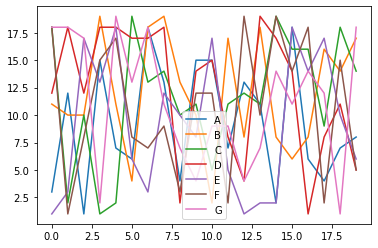

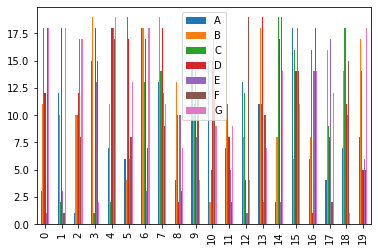

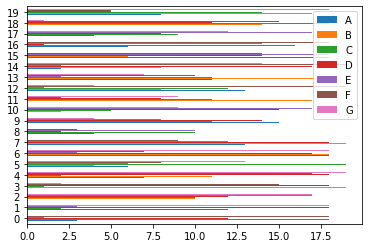

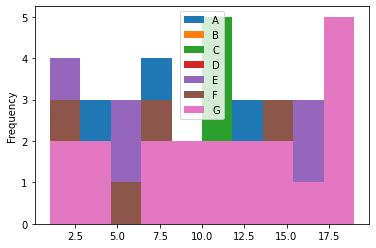

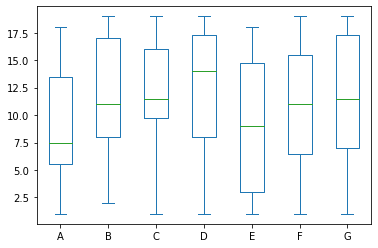

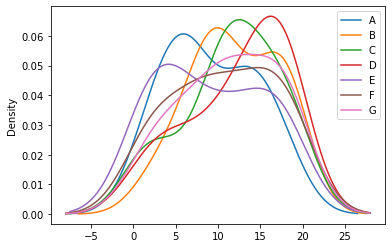

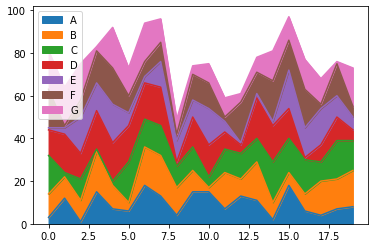

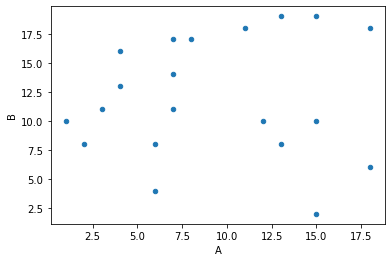

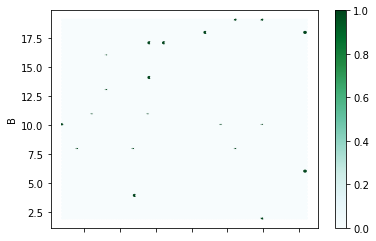

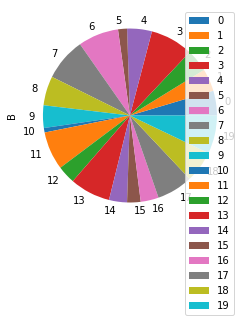

In [49]:
df = generate_sample_data()

df.plot(kind = "line")
df.plot(kind = "bar")
df.plot(kind = "barh")
df.plot(kind = "hist")
df.plot(kind = "box")
df.plot(kind = "kde")
df.plot(kind = "area")

# the following plots requiere x and y
df.plot(x = "A", y = "B", kind = "scatter")
df.plot(x = "A", y = "B", kind = "hexbin")
df.plot(x = "A", y = "B", kind = "pie") # here you can pass only x but you need to add subplots = True

# other plots are available through pd.plotting
# more about plotting https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

<a id = "trick51"></a>
# Trick 51: Concatenate 2 column strings
[Go back to the Table of Contents](#table_of_contents)

In [50]:
print_files()

df = pd.read_csv("/kaggle/input/titanic/train.csv")

# Solution 1: using str.cat 
df["Name"].str.cat(df["Sex"], sep = ", ").head()

# using + sign
df["Name"] + ", " + df["Sex"].head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/titanic/train.csv'

<a id = "trick50"></a>
# Trick 50: Named aggregation with multiple columns passing tupples (new in pandas 0.25)
[Go back to the Table of Contents](#table_of_contents)

In [ ]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

# Typical groupby
print("Problem: MultiIndex")
df.groupby("Pclass").agg({"Age":["mean", "max"], "Survived": "mean"})

# Please note that this has been covered in 86 and 86 bis.
# This is just one more way to do it.
print("Named aggregation")
df.groupby("Pclass").agg(avg_age = ("Age", "mean"),
                        max_age = ("Age", "max"), 
                        survival_rate = ("Survived", "mean"))

<a id = "trick49"></a>
# Trick 49: Sampling with pandas (with replacement and weights)
[Go back to the Table of Contents](#table_of_contents)

In [ ]:
d = {"A": [100, 200, 300, 400, 100], "W":[10, 5, 0, 3, 8]}
df = pd.DataFrame(d)
df

# with replacement
df.sample(n = 5, replace = True, random_state = 2)

# adding weights
df.sample(n = 5, replace = True, random_state = 2, weights = "W")


<a id = "trick48"></a>
# Trick 48: Useful parameters when using pd.read_csv()
[Go back to the Table of Contents](#table_of_contents)

In [ ]:

df = pd.read_csv("/kaggle/input/drinks-by-country/drinksbycountry.csv")
df.head()
df.dtypes

# Let's import the country and beer_servings columns, convert them to string and float64 respectevly
# Import only the first 5 rows and thread 0 as nans
df = pd.read_csv("/kaggle/input/drinks-by-country/drinksbycountry.csv",
                    usecols=["country", "beer_servings"],
                    dtype={"country":"category", "beer_servings":"float64"},
                    nrows = 5,
                    na_values = 0.0)
df.head()
df.dtypes

# more about read_csv on https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

<a id = "trick47"></a>
# Trick 47: Create one row for each item in a list (explode)
[Go back to the Table of Contents](#table_of_contents)

In [51]:
d = {"Team":["FC Barcelona", "FC Real Madrid"], 
    "Players":[["Ter Stegen", "Semedo", "Piqué", "Lenglet", "Alba", "Rakitic", "De Jong", "Sergi Roberto", "Messi", "Suárez", "Griezmann"], \
               ["Courtois", "Carvajal", "Varane", "Sergio Ramos", "Mendy", "Kroos", "Valverde", "Casemiro", "Isco", "Benzema", "Bale"]]}

print("Notice that we have a list of players for each team. Let's generate a row for each player.")
df = pd.DataFrame(d)
df

print("Using explode to generate new rows for each player.")
df1 = df.explode("Players")
df1

print("Reverse this operation with groupby and agg")
df["Imploded"] = df1.groupby(df1.index)["Players"].agg(list)
df

Notice that we have a list of players for each team. Let's generate a row for each player.


,Team,Players
0,FC Barcelona,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
1,FC Real Madrid,"[Courtois, Carvajal, Varane, Sergio Ramos, Men..."


Using explode to generate new rows for each player.


,Team,Players
0,FC Barcelona,Ter Stegen
0,FC Barcelona,Semedo
0,FC Barcelona,Piqué
0,FC Barcelona,Lenglet
0,FC Barcelona,Alba
0,FC Barcelona,Rakitic
0,FC Barcelona,De Jong
0,FC Barcelona,Sergi Roberto
0,FC Barcelona,Messi
0,FC Barcelona,Suárez


Reverse this operation with groupby and agg


,Team,Players,Imploded
0,FC Barcelona,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak...","[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
1,FC Real Madrid,"[Courtois, Carvajal, Varane, Sergio Ramos, Men...","[Courtois, Carvajal, Varane, Sergio Ramos, Men..."


<a id = "trick46"></a>
# Trick 46: Store NaN in an integer type with Int64 (not int64)
[Go back to the Table of Contents](#table_of_contents)

In [52]:
print("Default series")
ser1 = pd.Series([10, 20])
ser1

print("Let's add a NaN to an int64 series")
ser1 = pd.Series([10, 20, np.nan])
ser1 # Notice it has been converted to float64

print("But if we use Int64 than everything will work")
ser1 = pd.Series([10, 20, np.nan], dtype = "Int64")
ser1

Default series


0    10
1    20
dtype: int64

Let's add a NaN to an int64 series


0    10.0
1    20.0
2     NaN
dtype: float64

But if we use Int64 than everything will work


0      10
1      20
2    <NA>
dtype: Int64

<a id = "trick45"></a>
# Trick 45: Create rows for values separated by commas in a cell (assing and explode)
[Go back to the Table of Contents](#table_of_contents)

In [53]:
d = {"Team":["FC Barcelona", "FC Real Madrid"], 
    "Players":["Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rakitic, De Jong, Sergi Roberto, Messi, Suárez, Griezmann",
               "Courtois, Carvajal, Varane, Sergio Ramos, Mendy, Kroos, Valverde, Casemiro, Isco, Benzema, Bale"]}

print("Notice that we have a list of players for each team separated by commas. Let's generate a row for each player.")
df = pd.DataFrame(d)
df

print("Notice that we have converted to something similar seen in example 47.")
df.assign(Players = df["Players"].str.split(","))

print("Now add explode and done.")
df.assign(Players = df["Players"].str.split(",")).explode("Players")

Notice that we have a list of players for each team separated by commas. Let's generate a row for each player.


,Team,Players
0,FC Barcelona,"Ter Stegen, Semedo, Piqué, Lenglet, Alba, Raki..."
1,FC Real Madrid,"Courtois, Carvajal, Varane, Sergio Ramos, Mend..."


Notice that we have converted to something similar seen in example 47.


,Team,Players
0,FC Barcelona,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba,..."
1,FC Real Madrid,"[Courtois, Carvajal, Varane, Sergio Ramos, ..."


Now add explode and done.


,Team,Players
0,FC Barcelona,Ter Stegen
0,FC Barcelona,Semedo
0,FC Barcelona,Piqué
0,FC Barcelona,Lenglet
0,FC Barcelona,Alba
0,FC Barcelona,Rakitic
0,FC Barcelona,De Jong
0,FC Barcelona,Sergi Roberto
0,FC Barcelona,Messi
0,FC Barcelona,Suárez


<a id = "trick44"></a>
# Trick 44: Use a local variable within a query in pandas (using @)
[Go back to the Table of Contents](#table_of_contents)

In [54]:
df = generate_sample_data()
df

# create a local variable mean
mean = df["A"].mean()

# now let's use in inside a query of pandas using @
df.query("A > @mean")


,A,B,C,D,E,F,G
0,5,1,4,7,18,8,12
1,7,16,8,15,16,19,11
2,8,4,6,5,17,3,11
3,3,4,1,9,2,11,18
4,1,5,17,18,9,4,3
5,12,18,5,4,9,2,1
6,13,14,5,10,2,5,11
7,18,9,17,14,10,15,12
8,10,13,16,7,16,6,3
9,3,18,15,16,4,6,18


,A,B,C,D,E,F,G
5,12,18,5,4,9,2,1
6,13,14,5,10,2,5,11
7,18,9,17,14,10,15,12
10,16,9,17,11,5,6,12
11,17,19,12,4,2,4,12
12,19,4,14,15,13,4,19
13,17,19,16,6,3,3,1
14,16,13,12,12,10,19,7
15,17,9,9,1,15,8,17
17,15,1,6,5,13,18,9


<a id = "trick43"></a>
# Trick 43: Create one row for each item in a list (explode) !!!duplicated Trick 47!!!
[Go back to the Table of Contents](#table_of_contents)

In [55]:
# It seems that this trick is duplicated, skip to the next one
# I decided to keep in, so in the future there will be no confusion if you consult the original material
# and this kernel
d = {"Team":["FC Barcelona", "FC Real Madrid"], 
    "Players":[["Ter Stegen", "Semedo", "Piqué", "Lenglet", "Alba", "Rakitic", "De Jong", "Sergi Roberto", "Messi", "Suárez", "Griezmann"], \
               ["Courtois", "Carvajal", "Varane", "Sergio Ramos", "Mendy", "Kroos", "Valverde", "Casemiro", "Isco", "Benzema", "Bale"]]}

print("Notice that we have a list of players for each team. Let's generate a row for each player.")
df = pd.DataFrame(d)
df

print("Using explode to generate new rows for each player.")
df1 = df.explode("Players")
df1

print("Reverse this operation with groupby and agg")
df["Imploded"] = df1.groupby(df1.index)["Players"].agg(list)
df

Notice that we have a list of players for each team. Let's generate a row for each player.


,Team,Players
0,FC Barcelona,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
1,FC Real Madrid,"[Courtois, Carvajal, Varane, Sergio Ramos, Men..."


Using explode to generate new rows for each player.


,Team,Players
0,FC Barcelona,Ter Stegen
0,FC Barcelona,Semedo
0,FC Barcelona,Piqué
0,FC Barcelona,Lenglet
0,FC Barcelona,Alba
0,FC Barcelona,Rakitic
0,FC Barcelona,De Jong
0,FC Barcelona,Sergi Roberto
0,FC Barcelona,Messi
0,FC Barcelona,Suárez


Reverse this operation with groupby and agg


,Team,Players,Imploded
0,FC Barcelona,"[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak...","[Ter Stegen, Semedo, Piqué, Lenglet, Alba, Rak..."
1,FC Real Madrid,"[Courtois, Carvajal, Varane, Sergio Ramos, Men...","[Courtois, Carvajal, Varane, Sergio Ramos, Men..."


<a id = "trick42"></a>
# Trick 42: New aggregation function --> last()
[Go back to the Table of Contents](#table_of_contents)

In [56]:
d = {"patient":[1, 2, 3, 1, 1, 2], "visit":[2015, 2016, 2014, 2016, 2017, 2020]}
df = pd.DataFrame(d)
df.sort_values("visit")

print("Let's get the last visit for each patient")
df.groupby("patient")["visit"].last().to_frame()

,patient,visit
2,3,2014
0,1,2015
1,2,2016
3,1,2016
4,1,2017
5,2,2020


Let's get the last visit for each patient


,visit
patient,
1,2017
2,2020
3,2014


<a id = "trick41"></a>
# Trick 41: Ordered categories (from pandas.api.types import CategoricalDtypee)
[Go back to the Table of Contents](#table_of_contents)

In [57]:
import pandas as pd
from pandas.api.types import CategoricalDtype
d = {"ID":[100, 101, 102, 103], "quality":["bad", "very good", "good", "excellent"]}
df = pd.DataFrame(d)
df

print("Let's create our own categorical order.")
cat_type = CategoricalDtype(["bad", "good", "very good", "excellent"], ordered = True)
df["quality"] = df["quality"].astype(cat_type)
df

print("Now we can use logical sorting.")
df = df.sort_values("quality", ascending = True)
df

print("We can also filter this as if they are numbers. AMAZING.")
df[df["quality"] > "bad"]

,ID,quality
0,100,bad
1,101,very good
2,102,good
3,103,excellent


Let's create our own categorical order.


,ID,quality
0,100,bad
1,101,very good
2,102,good
3,103,excellent


Now we can use logical sorting.


,ID,quality
0,100,bad
2,102,good
1,101,very good
3,103,excellent


We can also filter this as if they are numbers. AMAZING.


,ID,quality
2,102,good
1,101,very good
3,103,excellent


<a id = "trick40"></a>
# Trick 40: Style you df fast with hide_index() and set_caption()
[Go back to the Table of Contents](#table_of_contents)

In [58]:
df = generate_sample_data()
print("Original df")
df

df.style.hide_index().set_caption("Styled df with no index and a caption")

Original df


,A,B,C,D,E,F,G
0,2,4,6,6,17,7,14
1,7,9,15,11,11,17,4
2,7,8,6,2,1,3,6
3,7,13,14,11,4,17,3
4,11,8,13,3,1,16,16
5,14,14,18,11,16,7,9
6,6,7,7,5,6,11,19
7,16,2,18,4,18,5,2
8,7,1,8,4,8,4,19
9,19,10,18,1,11,19,15


/var/folders/g5/ky6bmjt90kqbsypch2rdmgf00000gp/T/ipykernel_54907/3453551767.py:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df.style.hide_index().set_caption("Styled df with no index and a caption")


A,B,C,D,E,F,G
2,4,6,6,17,7,14
7,9,15,11,11,17,4
7,8,6,2,1,3,6
7,13,14,11,4,17,3
11,8,13,3,1,16,16
14,14,18,11,16,7,9
6,7,7,5,6,11,19
16,2,18,4,18,5,2
7,1,8,4,8,4,19
19,10,18,1,11,19,15


<a id = "trick39"></a>
# Trick 39: One hot encoding (get_dummies())
[Go back to the Table of Contents](#table_of_contents)

In [59]:
df = pd.read_csv("/kaggle/input/titanic/train.csv", usecols = [2, 4, 5, 11], nrows = 10)
df

pd.get_dummies(df) # Notice that we can eliminate one column of each since this information is contained in the others

pd.get_dummies(df, drop_first=True)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/titanic/train.csv'

<a id = "trick38"></a>
# Trick 38: Pandas datetime (lot's of examples)
[Go back to the Table of Contents](#table_of_contents)

In [60]:
df = generate_sample_data_datetime().reset_index()
df = df.sample(500)
df["Year"] = df["index"].dt.year
df["Month"] = df["index"].dt.month
df["Day"] = df["index"].dt.day
df["Hour"] = df["index"].dt.hour
df["Minute"] = df["index"].dt.minute
df["Second"] = df["index"].dt.second
df["Nanosecond"] = df["index"].dt.nanosecond
df["Date"] = df["index"].dt.date
df["Time"] = df["index"].dt.time
df["Time_Time_Zone"] = df["index"].dt.timetz
df["Day_Of_Year"] = df["index"].dt.dayofyear
df["Week_Of_Year"] = df["index"].dt.weekofyear
df["Week"] = df["index"].dt.week
df["Day_Of_week"] = df["index"].dt.dayofweek
df["Week_Day"] = df["index"].dt.weekday
df["Week_Day_Name"] = df["index"].dt.weekday_name
df["Quarter"] = df["index"].dt.quarter
df["Days_In_Month"] = df["index"].dt.days_in_month
df["Is_Month_Start"] = df["index"].dt.is_month_start
df["Is_Month_End"] = df["index"].dt.is_month_end
df["Is_Quarter_Start"] = df["index"].dt.is_quarter_start
df["Is_Quarter_End"] = df["index"].dt.is_quarter_end
df["Is_Leap_Year"] = df["index"].dt.is_leap_year
df

/var/folders/g5/ky6bmjt90kqbsypch2rdmgf00000gp/T/ipykernel_54907/1677656332.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week_Of_Year"] = df["index"].dt.weekofyear
/var/folders/g5/ky6bmjt90kqbsypch2rdmgf00000gp/T/ipykernel_54907/1677656332.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"] = df["index"].dt.week


AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

<a id = "trick37"></a>
# Trick 37: Pandas slicing loc and iloc (6 examples)
[Go back to the Table of Contents](#table_of_contents)

In [61]:
df = generate_sample_data()
df

# using loc --> labels
df.loc[0, "A"]

# using iloc --> position
df.iloc[0, 0]

# mixing labels and position with loc
df.loc[0, df.columns[0]]

# mixing labels and position with loc
df.loc[df.index[0], "A"]

# mixing labels and position with iloc
df.iloc[0, df.columns.get_loc("A")]

# mixing labels and position with iloc
df.iloc[df.index.get_loc(0), 0]

,A,B,C,D,E,F,G
0,5,2,11,4,14,11,10
1,2,6,5,10,2,14,14
2,9,3,17,6,1,15,17
3,5,5,13,17,16,7,3
4,10,8,14,1,13,7,3
5,14,7,2,18,10,7,18
6,4,7,3,11,1,2,15
7,8,17,11,15,17,17,4
8,5,11,15,7,11,9,17
9,8,7,4,15,10,11,11


5

5

5

5

5

5

<a id = "trick36"></a>
# Trick 36: Convert from UTC to another timezone
[Go back to the Table of Contents](#table_of_contents)

In [62]:
s = pd.Series(range(1552194000, 1552212001, 3600))
s = pd.to_datetime(s, unit = "s")
s

# set timezome to current time zone (UTC)
s = s.dt.tz_localize("UTC")
s

# set timezome to another time zone (Chicago)
s = s.dt.tz_convert("America/Chicago")
s

0   2019-03-10 05:00:00
1   2019-03-10 06:00:00
2   2019-03-10 07:00:00
3   2019-03-10 08:00:00
4   2019-03-10 09:00:00
5   2019-03-10 10:00:00
dtype: datetime64[ns]

0   2019-03-10 05:00:00+00:00
1   2019-03-10 06:00:00+00:00
2   2019-03-10 07:00:00+00:00
3   2019-03-10 08:00:00+00:00
4   2019-03-10 09:00:00+00:00
5   2019-03-10 10:00:00+00:00
dtype: datetime64[ns, UTC]

0   2019-03-09 23:00:00-06:00
1   2019-03-10 00:00:00-06:00
2   2019-03-10 01:00:00-06:00
3   2019-03-10 03:00:00-05:00
4   2019-03-10 04:00:00-05:00
5   2019-03-10 05:00:00-05:00
dtype: datetime64[ns, America/Chicago]

<a id = "trick35"></a>
# Trick 35: Query a column that has spaces in the name (using backticks)
[Go back to the Table of Contents](#table_of_contents)

In [63]:
d = {"colum_without_space":np.array([1, 2, 3, 4, 5, 6]), "column with space":np.array([1, 2, 3, 4, 5, 6])*2}
df = pd.DataFrame(d)
df

print("Query a column without space")
df.query("colum_without_space > 4")
print("Query a column with space using backticks ``")
print("This is a backtick ``")
df.query("`column with space` > 8")

,colum_without_space,column with space
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
5,6,12


Query a column without space


,colum_without_space,column with space
4,5,10
5,6,12


Query a column with space using backticks ``
This is a backtick ``


,colum_without_space,column with space
4,5,10
5,6,12


<a id = "trick34"></a>
# Trick 34: Explore a dataset with profiling
[Go back to the Table of Contents](#table_of_contents)

In [64]:
import pandas_profiling

df = generate_sample_data()

df

print("Generating report with pandas profiling")
df.profile_report()


ModuleNotFoundError: No module named 'pandas_profiling'

<a id = "trick33"></a>
# Trick 33: Pandas display options
[Go back to the Table of Contents](#table_of_contents)

In [65]:
# use pd.describe_option() to see all
# max_rows
# max_columns
# max_colwidth
# precision
# date_dayfirst
# date_yearfirst

df = generate_sample_data_datetime()[:10].reset_index()
df["sales"] = df["sales"].astype("float")
df

pd.set_option("display.max_rows",5)
pd.set_option("display.max_columns",3)
pd.set_option('display.width', 1000)
pd.set_option('display.date_dayfirst', True)
pd.describe_option()

pd.reset_option('^display.', silent=True) # restore to default
#pd.reset_option('display.width') # restore one by one

,index,sales,customers
0,2000-01-01 00:00:00,11.0,16
1,2000-01-01 01:00:00,19.0,9
2,2000-01-01 02:00:00,16.0,11
3,2000-01-01 03:00:00,19.0,7
4,2000-01-01 04:00:00,14.0,8
5,2000-01-01 05:00:00,11.0,19
6,2000-01-01 06:00:00,17.0,15
7,2000-01-01 07:00:00,19.0,17
8,2000-01-01 08:00:00,8.0,13
9,2000-01-01 09:00:00,1.0,9


compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

<a id = "trick32"></a>
# Trick 32: Filter a df with query and avoid intermediate variables
[Go back to the Table of Contents](#table_of_contents)

In [66]:
df = generate_sample_data()[:10]
df["A"] = pd.Series(["APP", "GOO", "APP", "GOO", "MIC", "MIC", "APP", "GOO", "MIC", "APP"])
df.rename(columns = {"A":"stock"}, inplace = True)
print("Original df")
df

print("Filter data using intermediate variables")
temp = df.groupby("stock").mean()
temp 

fv = temp["B"].sort_values(ascending = False)[1] # filter by the second greates. This way every time we generate sample data we will have a result
temp[temp["B"] < fv]

print("Filter using query")
df.groupby("stock").mean().query("B < {}".format(fv))
df.groupby("stock").mean().query("B < @fv")
df.groupby("stock").mean().query("B < 10")

Original df


,stock,B,C,D,E,F,G
0,APP,5,17,2,13,12,10
1,GOO,11,16,10,15,19,17
2,APP,10,12,12,12,5,19
3,GOO,19,9,16,19,10,11
4,MIC,8,16,3,2,5,2
5,MIC,13,15,13,18,6,1
6,APP,17,1,1,7,12,5
7,GOO,3,9,15,4,2,17
8,MIC,12,14,15,1,12,3
9,APP,19,5,9,6,9,10


Filter data using intermediate variables


,B,C,D,E,F,G
stock,,,,,,
APP,12.75,8.750000,6.000000,9.500000,9.500000,11.0
GOO,11.00,11.333333,13.666667,12.666667,10.333333,15.0
MIC,11.00,15.000000,10.333333,7.000000,7.666667,2.0


,B,C,D,E,F,G
stock,,,,,,


Filter using query


,B,C,D,E,F,G
stock,,,,,,


,B,C,D,E,F,G
stock,,,,,,


,B,C,D,E,F,G
stock,,,,,,


<a id = "trick31"></a>
# Trick 31: See all the columns of a big df
[Go back to the Table of Contents](#table_of_contents)

In [67]:
pd.reset_option('^display.', silent=True) # restore to default

df = generate_sample_data()
df1 = df.copy(deep = True)
df = df.append(df1)

print("Imagine we have a big df where we can see all the columns ...")
df.T.head() # we are trasposing JUST TO CREATE A GIANT DF

# Solution 1
print("Solution 1 using pd.set_option display.max_columns")
pd.set_option("display.max_columns", None)
df.T.head()
pd.reset_option('^display.', silent=True) # restore to default

# Solution 2
print("Another clever solution using Traspose")
df.T.head().T

Imagine we have a big df where we can see all the columns ...


/var/folders/g5/ky6bmjt90kqbsypch2rdmgf00000gp/T/ipykernel_54907/3752448244.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)


,0,1,2,3,4,5,6,7,8,9,...,10,11,12,13,14,15,16,17,18,19
A,4,7,16,6,5,12,16,6,5,13,...,18,12,13,12,19,19,13,12,6,13
B,5,13,4,19,18,18,17,4,7,6,...,18,10,9,14,14,17,11,11,10,17
C,6,12,2,11,1,18,13,6,17,9,...,13,18,18,1,16,9,3,19,14,17
D,11,9,2,13,18,14,12,2,3,19,...,4,2,8,7,18,9,6,4,6,17
E,16,16,13,10,8,3,5,12,1,18,...,9,10,4,17,19,12,2,17,6,8


Solution 1 using pd.set_option display.max_columns


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
A,4,7,16,6,5,12,16,6,5,13,18,12,13,12,19,19,13,12,6,13,4,7,16,6,5,12,16,6,5,13,18,12,13,12,19,19,13,12,6,13
B,5,13,4,19,18,18,17,4,7,6,18,10,9,14,14,17,11,11,10,17,5,13,4,19,18,18,17,4,7,6,18,10,9,14,14,17,11,11,10,17
C,6,12,2,11,1,18,13,6,17,9,13,18,18,1,16,9,3,19,14,17,6,12,2,11,1,18,13,6,17,9,13,18,18,1,16,9,3,19,14,17
D,11,9,2,13,18,14,12,2,3,19,4,2,8,7,18,9,6,4,6,17,11,9,2,13,18,14,12,2,3,19,4,2,8,7,18,9,6,4,6,17
E,16,16,13,10,8,3,5,12,1,18,9,10,4,17,19,12,2,17,6,8,16,16,13,10,8,3,5,12,1,18,9,10,4,17,19,12,2,17,6,8


Another clever solution using Traspose


,A,B,C,D,E
0,4,5,6,11,16
1,7,13,12,9,16
2,16,4,2,2,13
3,6,19,11,13,10
4,5,18,1,18,8
5,12,18,18,14,3
6,16,17,13,12,5
7,6,4,6,2,12
8,5,7,17,3,1
9,13,6,9,19,18


<a id = "trick30"></a>
# Trick 30: Pandas merge --> see where the columns are coming from (indicator = True)
[Go back to the Table of Contents](#table_of_contents)

In [68]:
df = generate_sample_data()
df1 = df.copy(deep = True)
df1 = df1.drop([0, 1, 2], axis = "rows") # drop some index just to see the example workings
df.head()
df1.head()

pd.merge(df, df1, how = "left", indicator = True)


,A,B,C,D,E,F,G
0,13,6,11,11,12,8,14
1,1,11,18,4,6,11,19
2,14,3,18,15,16,15,12
3,13,5,8,12,8,19,8
4,3,4,7,13,15,6,15


,A,B,C,D,E,F,G
3,13,5,8,12,8,19,8
4,3,4,7,13,15,6,15
5,11,19,2,17,11,2,10
6,6,2,3,16,2,19,2
7,19,15,6,18,1,8,13


,A,B,C,D,E,F,G,_merge
0,13,6,11,11,12,8,14,left_only
1,1,11,18,4,6,11,19,left_only
2,14,3,18,15,16,15,12,left_only
3,13,5,8,12,8,19,8,both
4,3,4,7,13,15,6,15,both
5,11,19,2,17,11,2,10,both
6,6,2,3,16,2,19,2,both
7,19,15,6,18,1,8,13,both
8,2,19,7,18,9,13,11,both
9,16,13,4,18,15,2,6,both


<a id = "trick29"></a>
# Trick 29: Access numpy within pandas (without importing numpy as np)
[Go back to the Table of Contents](#table_of_contents)

In [69]:
# Pandas is built upon numpy, so we can acess all numpy functionality from pandas
pd.np.random.rand(2, 3)
pd.np.nan

/var/folders/g5/ky6bmjt90kqbsypch2rdmgf00000gp/T/ipykernel_54907/3996428819.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.random.rand(2, 3)


array([[0.26198201, 0.09699525, 0.97018203],
       [0.18802754, 0.57427294, 0.091344  ]])

/var/folders/g5/ky6bmjt90kqbsypch2rdmgf00000gp/T/ipykernel_54907/3996428819.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.nan


nan

<a id = "trick28"></a>
# Trick 28: Aggregating by multiple columns (using agg)
[Go back to the Table of Contents](#table_of_contents)

In [70]:
df = pd.read_csv("/kaggle/input/drinks-by-country/drinksbycountry.csv")
print("Original df")
df

print("Groupby continent beer_servings")
df.groupby("continent")["beer_servings"].mean()

print("Using agg to pass multiple functions")
df.groupby("continent")["beer_servings"].agg(["mean", "count"])

print("Using describe over a groupby object")
df.groupby("continent")["beer_servings"].describe()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/drinks-by-country/drinksbycountry.csv'

<a id = "trick27"></a>
# Trick 27: Aggregation over timeseries (resample)
[Go back to the Table of Contents](#table_of_contents)

In [71]:
df = generate_sample_data_datetime()

print("Original df")
df
print("Let's resample/groupby by month")
df.resample("M")["sales"].sum()

print("Let's resample/groupby by day")
df.resample("D")["sales"].sum()

Original df


,sales,customers
2000-01-01 00:00:00,19,18
2000-01-01 01:00:00,8,4
2000-01-01 02:00:00,4,7
2000-01-01 03:00:00,2,19
2000-01-01 04:00:00,2,9
...,...,...
2000-12-30 19:00:00,14,2
2000-12-30 20:00:00,17,17
2000-12-30 21:00:00,8,9
2000-12-30 22:00:00,12,2


Let's resample/groupby by month


2000-01-31    7250
2000-02-29    6848
2000-03-31    7285
2000-04-30    7060
2000-05-31    7660
2000-06-30    7229
2000-07-31    7463
2000-08-31    7215
2000-09-30    6935
2000-10-31    7652
2000-11-30    7542
2000-12-31    7182
Freq: M, Name: sales, dtype: int64

Let's resample/groupby by day


2000-01-01    223
2000-01-02    239
2000-01-03    225
2000-01-04    227
2000-01-05    260
             ... 
2000-12-26    237
2000-12-27    211
2000-12-28    263
2000-12-29    208
2000-12-30    269
Freq: D, Name: sales, Length: 365, dtype: int64

<a id = "trick26"></a>
# Trick 26: Formatting different columns of a df (using dictionaries)
[Go back to the Table of Contents](#table_of_contents)

In [72]:
df = generate_sample_data_datetime().reset_index()[:10]
df.rename(columns = {"index":"time"}, inplace = True)
df["sales_100"] = df["sales"]*100
print("Original df")
df.head()

# declare a formatting dict: individual for each column
fd = {"time":"{:%d/%m/%y}", "sales":"${:.2f}", "customers":"{:,}"}
df.style.format(fd)
df

# add some more formattin
(df.style.format(fd)
 .hide_index()
 .highlight_min("sales", color ="red")
 .highlight_max("sales", color ="green")
 .background_gradient(subset = "sales_100", cmap ="Blues")
 .bar("customers", color = "lightblue", align = "zero")
 .set_caption("A df with different stylings")
)

Original df


,time,sales,customers,sales_100
0,2000-01-01 00:00:00,6,13,600
1,2000-01-01 01:00:00,6,10,600
2,2000-01-01 02:00:00,10,12,1000
3,2000-01-01 03:00:00,9,10,900
4,2000-01-01 04:00:00,17,17,1700


,time,sales,customers,sales_100
0,01/01/00,$6.00,13,600
1,01/01/00,$6.00,10,600
2,01/01/00,$10.00,12,1000
3,01/01/00,$9.00,10,900
4,01/01/00,$17.00,17,1700
5,01/01/00,$11.00,18,1100
6,01/01/00,$12.00,19,1200
7,01/01/00,$12.00,13,1200
8,01/01/00,$9.00,17,900
9,01/01/00,$12.00,19,1200


,time,sales,customers,sales_100
0,2000-01-01 00:00:00,6,13,600
1,2000-01-01 01:00:00,6,10,600
2,2000-01-01 02:00:00,10,12,1000
3,2000-01-01 03:00:00,9,10,900
4,2000-01-01 04:00:00,17,17,1700
5,2000-01-01 05:00:00,11,18,1100
6,2000-01-01 06:00:00,12,19,1200
7,2000-01-01 07:00:00,12,13,1200
8,2000-01-01 08:00:00,9,17,900
9,2000-01-01 09:00:00,12,19,1200


/var/folders/g5/ky6bmjt90kqbsypch2rdmgf00000gp/T/ipykernel_54907/1219086163.py:13: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  (df.style.format(fd)


time,sales,customers,sales_100
01/01/00,$6.00,13,600
01/01/00,$6.00,10,600
01/01/00,$10.00,12,1000
01/01/00,$9.00,10,900
01/01/00,$17.00,17,1700
01/01/00,$11.00,18,1100
01/01/00,$12.00,19,1200
01/01/00,$12.00,13,1200
01/01/00,$9.00,17,900
01/01/00,$12.00,19,1200


<a id = "trick25"></a>
# Trick 25: 3 ways of renaming columns names
[Go back to the Table of Contents](#table_of_contents)

In [73]:
df = generate_sample_data()
df.head(2)

# Solution 1
df.rename({"A":"col_1", "B":"col_2"}, axis = "columns", inplace = True)
df.head(2)

# Solution 2
df.columns = ["col1", "col2", "col3", "col4","col5", "col6", "col7"] # list must be equal to the columns number
df.head(2)

# Solution 3
df.columns = df.columns.str.title() # apply any string method to the columns names
df.head(2)

,A,B,C,D,E,F,G
0,17,18,11,12,15,7,2
1,15,2,19,2,15,19,17


,col_1,col_2,C,D,E,F,G
0,17,18,11,12,15,7,2
1,15,2,19,2,15,19,17


,col1,col2,col3,col4,col5,col6,col7
0,17,18,11,12,15,7,2
1,15,2,19,2,15,19,17


,Col1,Col2,Col3,Col4,Col5,Col6,Col7
0,17,18,11,12,15,7,2
1,15,2,19,2,15,19,17


<a id = "trick24"></a>
# Trick 24: Copy data from Excel into pandas quick (read_clipboard())
[Go back to the Table of Contents](#table_of_contents)

In [74]:
# You will have to check this on your local machine
# Useful for fast importing
# Step 1: copy a table from excel sheet using ctrl + c (to the clipboard)
# Step 2: run this command
# df = pd.read_clipboard()

<a id = "trick23"></a>
# Trick 23: Fill missing values in time series data (interpolate())
[Go back to the Table of Contents](#table_of_contents)

In [75]:
d = {"col1":[100, 120 ,140, np.nan, 160], "col2":[9, 10, np.nan, 7.5, 6.5]}
df = pd.DataFrame(d)
df.index = pd.util.testing.makeDateIndex()[0:5]
print("Original df")
df
print("DataFrame after interpolate")
df.interpolate()

Original df


,col1,col2
2000-01-03,100.0,9.0
2000-01-04,120.0,10.0
2000-01-05,140.0,NaN
2000-01-06,NaN,7.5
2000-01-07,160.0,6.5


DataFrame after interpolate


,col1,col2
2000-01-03,100.0,9.00
2000-01-04,120.0,10.00
2000-01-05,140.0,8.75
2000-01-06,150.0,7.50
2000-01-07,160.0,6.50


<a id = "trick22"></a>
# Trick 22: Create DataFrames for testing
[Go back to the Table of Contents](#table_of_contents)

In [76]:
print("Contains random values")
df1 = pd.util.testing.makeDataFrame() # contains random values
df1
print("Contains missing values")
df2 = pd.util.testing.makeMissingDataframe() # contains missing values
df2
print("Contains datetime values")
df3 = pd.util.testing.makeTimeDataFrame() # contains datetime values
df3
print("Contains mixed values")
df4 = pd.util.testing.makeMixedDataFrame() # contains mixed values
df4

Contains random values


,A,B,C,D
p2Csb5GP3O,-1.555237,-0.947099,-0.471046,0.386219
66z7CXe4YB,0.751153,0.236608,-0.090246,-0.732555
UCXpvkrdbk,-1.734746,1.006320,-0.437311,1.353465
ShyPwcaIwU,-0.437104,-0.059365,-0.019050,0.934394
9run7Bv7qt,-1.458478,0.581162,1.015887,2.188767
27AtO2Y71W,-1.514986,-0.424891,0.845759,0.810450
Ch53wP5POs,-1.691246,-1.564742,0.022152,1.294842
kM7yrX6GHh,-0.737493,-0.050162,-1.467293,-1.440520
0z7JSuTOYD,0.638734,0.656254,-0.015080,0.696909
csTyYfccDR,1.686505,1.643076,-1.155154,0.799597


Contains missing values


,A,B,C,D
TuQMZTV78B,-0.102640,-0.620504,1.127580,NaN
kl9oCXxaqu,-0.320155,0.148444,0.921231,-0.797520
7GZoauOuPg,-0.227211,0.958207,-1.582892,0.303621
aKZqPt924M,-1.447639,0.816058,0.168486,-0.637403
zrpAuvhurE,0.220006,1.181033,0.911540,1.191435
ZXZM51hbnN,0.346921,-0.816921,0.744282,-0.644649
afviH1gWHS,-0.436907,-0.167195,0.422794,-0.999598
66K6UtEKfp,NaN,0.998919,-1.442196,1.012829
N0qno5A2yh,0.287137,0.666252,0.955833,0.765760
Tz96Pcz0wp,-0.194407,-2.973031,NaN,-0.690907


Contains datetime values


,A,B,C,D
2000-01-03,-1.840768,0.277588,-0.337534,-0.651001
2000-01-04,0.410043,-1.862368,1.908830,1.209731
2000-01-05,0.966102,0.378842,1.860419,3.345944
2000-01-06,0.176525,1.186342,0.135066,0.069499
2000-01-07,2.180260,1.512860,0.198475,1.057706
2000-01-10,0.252855,-0.014455,0.263990,-0.266452
2000-01-11,-1.459506,-0.554020,1.682877,-0.214966
2000-01-12,2.147286,-0.461391,-1.081673,1.268336
2000-01-13,0.396452,-0.240892,0.178248,-0.112482
2000-01-14,-0.721548,-2.310597,-0.386963,2.017487


Contains mixed values


,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


<a id = "trick21"></a>
# Trick 21: Split a string column into multiple columns
[Go back to the Table of Contents](#table_of_contents)

In [77]:
d = {"name":["John Artur Doe", "Jane Ann Smith", "Nico P"], "location":["Los Angeles, CA", "Washington, DC", "Barcelona, Spain"]}
df = pd.DataFrame(d)
df

df[["first", "middle", "last"]] = df["name"].str.split(" ", expand = True)
df["city"] = df["location"].str.split(",", expand = True)[0]
df

,name,location
0,John Artur Doe,"Los Angeles, CA"
1,Jane Ann Smith,"Washington, DC"
2,Nico P,"Barcelona, Spain"


,name,location,first,middle,last,city
0,John Artur Doe,"Los Angeles, CA",John,Artur,Doe,Los Angeles
1,Jane Ann Smith,"Washington, DC",Jane,Ann,Smith,Washington
2,Nico P,"Barcelona, Spain",Nico,P,None,Barcelona


<a id = "trick20"></a>
# Trick 20: Create a datetime columns from multiple columns
[Go back to the Table of Contents](#table_of_contents)

In [78]:
d = {"day":[1, 2, 10 ,25, 12], "month":[1, 2, 4, 5, 6], "year":[2000, 2001, 2010, 2015, 2020]}
df = pd.DataFrame(d)
df["date"] = pd.to_datetime(df[["day", "month", "year"]])
df
df.dtypes

,day,month,year,date
0,1,1,2000,2000-01-01
1,2,2,2001,2001-02-02
2,10,4,2010,2010-04-10
3,25,5,2015,2015-05-25
4,12,6,2020,2020-06-12


day               int64
month             int64
year              int64
date     datetime64[ns]
dtype: object

<a id = "trick19"></a>
# Trick 19: Show memory usage of a df and every column
[Go back to the Table of Contents](#table_of_contents)

In [79]:
df = generate_sample_data_datetime().reset_index()
df.columns = ["date", "sales", "customers"]
df

print("Show the global usage of memory of the df")
df.info(memory_usage = "deep")
print()
print("Show the usage of memory of every column")
df.memory_usage(deep = True)

,date,sales,customers
0,2000-01-01 00:00:00,1,4
1,2000-01-01 01:00:00,6,7
2,2000-01-01 02:00:00,9,12
3,2000-01-01 03:00:00,7,4
4,2000-01-01 04:00:00,15,6
...,...,...,...
8755,2000-12-30 19:00:00,4,12
8756,2000-12-30 20:00:00,18,12
8757,2000-12-30 21:00:00,1,2
8758,2000-12-30 22:00:00,12,11


Show the global usage of memory of the df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       8760 non-null   datetime64[ns]
 1   sales      8760 non-null   int64         
 2   customers  8760 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 205.4 KB

Show the usage of memory of every column


Index          128
date         70080
sales        70080
customers    70080
dtype: int64

<a id = "trick18"></a>
# Trick 18: Read and write to a compressed file (csv.zip)
[Go back to the Table of Contents](#table_of_contents)

In [80]:
df = generate_sample_data()
df.head()

print("Writing data to a csv.zip file")
df.to_csv("trick18data.csv.zip")

print("Deleting df")
del df

print("Importing data from a csv.zip file")
df = pd.read_csv("/kaggle/working/trick18data.csv.zip", index_col=0)
df.head()

# other compression files supported .gz, .bz2, .xz

,A,B,C,D,E,F,G
0,3,8,8,5,8,18,7
1,1,8,15,6,2,11,10
2,6,16,9,11,11,8,2
3,7,15,17,8,5,8,17
4,4,2,14,6,5,17,12


Writing data to a csv.zip file
Deleting df
Importing data from a csv.zip file


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/trick18data.csv.zip'

<a id = "trick17"></a>
# Trick 17: Select multiple rows and columns with loc
[Go back to the Table of Contents](#table_of_contents)

In [81]:
df = generate_sample_data()
print("Original df")
df

print("Using a slice (inclusive)")
df.loc[0:4, "A":"E"]

print("Using a list")
df.loc[[0,4], ["A","E"]]

print("Using a condition")
df.loc[df["A"] > 10, ["A","E"]]

Original df


,A,B,C,D,E,F,G
0,13,3,14,11,5,11,9
1,14,8,3,8,12,11,19
2,11,5,11,4,5,1,12
3,13,6,15,11,13,16,4
4,7,19,4,18,2,14,18
5,5,9,19,19,1,19,7
6,8,3,14,3,13,5,15
7,5,17,8,10,10,16,1
8,6,7,12,15,2,16,16
9,17,17,2,9,18,8,7


Using a slice (inclusive)


,A,B,C,D,E
0,13,3,14,11,5
1,14,8,3,8,12
2,11,5,11,4,5
3,13,6,15,11,13
4,7,19,4,18,2


Using a list


,A,E
0,13,5
4,7,2


Using a condition


,A,E
0,13,5
1,14,12
2,11,5
3,13,13
9,17,18
11,17,19
12,19,17
13,11,19
16,17,1
18,16,6


<a id = "trick16"></a>
# Trick 16: Convert continuos values to categorical (cut())
[Go back to the Table of Contents](#table_of_contents)

In [82]:
df = generate_sample_data()
df["A"] = df["A"] + 5
df.rename(columns = {"A":"age"}, inplace = True)
df.sample(5)

df["age_groups"] = pd.cut(df["age"], bins = [0, 18, 65, 99], labels = ["kids", "adult", "elderly"])
df

,age,B,C,D,E,F,G
19,9,4,17,10,3,2,4
17,8,7,15,6,6,11,17
11,16,14,2,11,13,5,6
4,22,4,1,15,1,6,8
9,20,14,15,17,5,2,14


,age,B,C,D,E,F,G,age_groups
0,20,9,18,3,18,3,9,adult
1,23,6,16,4,1,11,15,adult
2,17,13,5,13,10,4,16,kids
3,24,6,18,5,19,16,5,adult
4,22,4,1,15,1,6,8,adult
5,18,8,8,19,2,9,1,kids
6,20,18,13,2,10,4,1,adult
7,19,2,17,9,15,7,9,adult
8,24,9,4,15,15,19,10,adult
9,20,14,15,17,5,2,14,adult


<a id = "trick15"></a>
# Trick 15: Reshape a MultiIndex df (unstack())
[Go back to the Table of Contents](#table_of_contents)

In [83]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
print("Original df")
df.head()

print("Groupby and create a MultiIndex df")
print("Notice we have a df with MultiIndex (Sex and Pclass)")
df.groupby(["Sex", "Pclass"])["Survived"].mean().to_frame()

print("Reshaping using unstack")
print("Now we can interact with it like with a normal df")
df.groupby(["Sex", "Pclass"])["Survived"].mean().unstack()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/titanic/train.csv'

<a id = "trick14"></a>
# Trick 14: Creating toy df (3 methods)
[Go back to the Table of Contents](#table_of_contents)

In [84]:
# Method 1: from a dict
pd.DataFrame({"A":[10 ,20], "B":[30, 40]})

# Method 2: using numpy
pd.DataFrame(np.random.rand(2, 3), columns = list("ABC"))

# Method 3: using pandas builtin functionalities
pd.util.testing.makeMixedDataFrame()

,A,B
0,10,30
1,20,40


,A,B,C
0,0.202620,0.508718,0.080559
1,0.571649,0.880765,0.773506


,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


<a id = "trick13"></a>
# Trick 13: Avoid the series of lists TRAP
[Go back to the Table of Contents](#table_of_contents)

In [85]:
d = {"A":[1, 2, 3], "B":[[10, 20], [40, 50], [60, 70]]}
df = pd.DataFrame(d)
print("Notice that the column B has as values lists")
df
print("Convert it to normal series")
df_ = df["B"].apply(pd.Series)
df_

print("Join the 2 df")
pd.merge(df, df_, left_index = True, right_index = True)


Notice that the column B has as values lists


,A,B
0,1,"[10, 20]"
1,2,"[40, 50]"
2,3,"[60, 70]"


Convert it to normal series


,0,1
0,10,20
1,40,50
2,60,70


Join the 2 df


,A,B,0,1
0,1,"[10, 20]",10,20
1,2,"[40, 50]",40,50
2,3,"[60, 70]",60,70


<a id = "trick12"></a>
# Trick 12: Merging datasets and check uniqueness
[Go back to the Table of Contents](#table_of_contents)

In [86]:
df = generate_sample_data()[:10]
df1 = df.copy(deep = True)
df = df.drop([0, 1, 2])
df1 = df1.drop([8, 9])
df
df1

df_one_to_one = pd.merge(df, df1, validate = "one_to_one")
df_one_to_one

df_one_to_many = pd.merge(df, df1, validate = "one_to_many")
df_one_to_many

df_many_to_one = pd.merge(df, df1, validate = "many_to_one")
df_many_to_one


,A,B,C,D,E,F,G
3,1,3,9,12,15,5,12
4,6,19,4,10,3,11,4
5,16,9,4,9,14,3,13
6,4,10,17,2,5,14,1
7,6,14,12,13,8,9,7
8,18,17,2,15,6,19,6
9,5,6,13,14,19,6,1


,A,B,C,D,E,F,G
0,3,7,1,10,6,15,17
1,19,11,1,10,7,3,11
2,9,19,4,14,15,1,4
3,1,3,9,12,15,5,12
4,6,19,4,10,3,11,4
5,16,9,4,9,14,3,13
6,4,10,17,2,5,14,1
7,6,14,12,13,8,9,7


,A,B,C,D,E,F,G
0,1,3,9,12,15,5,12
1,6,19,4,10,3,11,4
2,16,9,4,9,14,3,13
3,4,10,17,2,5,14,1
4,6,14,12,13,8,9,7


,A,B,C,D,E,F,G
0,1,3,9,12,15,5,12
1,6,19,4,10,3,11,4
2,16,9,4,9,14,3,13
3,4,10,17,2,5,14,1
4,6,14,12,13,8,9,7


,A,B,C,D,E,F,G
0,1,3,9,12,15,5,12
1,6,19,4,10,3,11,4
2,16,9,4,9,14,3,13
3,4,10,17,2,5,14,1
4,6,14,12,13,8,9,7


<a id = "trick11"></a>
# Trick 11: Rename all columns with the same pattern
[Go back to the Table of Contents](#table_of_contents)

In [87]:
print_files()
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.columns = ["Passenger ID", "Survived", "Pclass", "Name         ", "Sex", "Age", "Sib SP", "Parch", "Ticket", "Fare", "Cabin", "Embarked"] # creating column names for the example
df
df1 = df.copy(deep = True)

print("Replace all spaces with undescore and convert to lower")
print("Notice the Passenger and Sib SP column now has underscore")
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.head()

print("Remove trailing (at the end) whitesapce and convert to lower")
print("Notice the Passenger and Sib SP column now has underscore")
df1.columns = df1.columns.str.lower().str.rstrip()
df1.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/titanic/train.csv'

<a id = "trick10"></a>
# Trick 10: Check the equality of 2 series
[Go back to the Table of Contents](#table_of_contents)

In [88]:
df = generate_sample_data()[["A", "B"]][:5]
df["A"] = pd.Series([15, 15, 18, np.nan, 12])
df["B"] = pd.Series([15, 15, 18, np.nan, 12])
df

print("Don't use ==, it does not handle NaN properly")
print("Notice that element 4 of each list is np.nan but == still returns False")
df["A"] == df["B"]

print("Using equals. Now we get True, so the 2 series are equal")
df["A"].equals(df["B"])

print("Equals also works for df")
df1 = df.copy(deep = True)
df.equals(df1)

print("== of df has the same issue as for series")
df == df1

,A,B
0,15.0,15.0
1,15.0,15.0
2,18.0,18.0
3,NaN,NaN
4,12.0,12.0


Don't use ==, it does not handle NaN properly
Notice that element 4 of each list is np.nan but == still returns False


0     True
1     True
2     True
3    False
4     True
dtype: bool

Using equals. Now we get True, so the 2 series are equal


True

Equals also works for df


True

== of df has the same issue as for series


,A,B
0,True,True
1,True,True
2,True,True
3,False,False
4,True,True


<a id = "trick9"></a>
# Trick 9: Reduce memory usage of a df while importing !!!duplicated Trick 83!!!
[Go back to the Table of Contents](#table_of_contents)

In [89]:
print_files()

df = pd.read_csv("/kaggle/input/imdb-data/IMDB-Movie-Data.csv", \
                 usecols = ["Title", "Genre", "Year", "Metascore", "Revenue (Millions)"])
df.dtypes
df.memory_usage(deep = True)

print("Importing only a few columns and converting to proper dtype")
df = pd.read_csv("/kaggle/input/imdb-data/IMDB-Movie-Data.csv", \
                 usecols = ["Title", "Genre", "Year", "Metascore", "Revenue (Millions)"], \
                dtype = {"Genre":"category", "Metascore":"Int64", "Year":"int8"})
df.dtypes
df.memory_usage(deep = True) # notice how Genre and Year are consuming now less memory

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/imdb-data/IMDB-Movie-Data.csv'

<a id = "trick8"></a>
# Trick 8: Using glob to generate a df from multiple files !!!duplicated Trick 78!!!
[Go back to the Table of Contents](#table_of_contents)

In [90]:
# let's generate some fake data
df1 = generate_sample_data()
df2 = generate_sample_data()
df3 = generate_sample_data()
# df1.head()
# df2.head()
# df3.head()
df1.to_csv("trick8data1.csv", index = False)
df2.to_csv("trick8data2.csv", index = False)
df3.to_csv("trick8data3.csv", index = False)

# Step 1 generate list with the file name
lf = []
for _,_, files in os.walk("/kaggle/working/"):
    for f in files:
        if "trick8data" in f:
            lf.append(f)
            
lf

# You can use this on your local machine
#from glob import glob
#files = glob("trick8.csv")

# Step 2: we do the same as in trick 78 except we don't create a new column of the rows origin (file they came from)
df = pd.concat((pd.read_csv(file) for file in lf), ignore_index = True)
df

[]

ValueError: No objects to concatenate

<a id = "trick7"></a>
# Trick 7: Dealing with missing values (NaN)
[Go back to the Table of Contents](#table_of_contents)

In [91]:
df = pd.util.testing.makeMissingDataframe().reset_index() # contains missing values
df.rename(columns = {"index":"A"})
df1 = df.copy(deep = True)
df

print("Calculate the % of missing values in each row")
df.isna().mean() # calculate the % of missing values in each row
print("Droping any columns that have missing values. Only column A wil remain")
df.dropna(axis = "columns") # drop any column that has missing values
print("Droping any rows that have missing values.")
df1.dropna(axis = "rows") # drop any row that has missing values
print("Droping column where missing values are above a threshold")
df.dropna(thresh = len(df)*0.95, axis = "columns") # drop any row that has missing values

,A,A,B,C,D
0,ccB1zEf73O,1.739777,-2.157844,0.047808,0.484214
1,cU4WBz6Qhz,-1.280255,1.546787,0.150976,0.134458
2,68EUHB4WWV,-0.994238,0.966644,-0.655920,-0.190559
3,sh1Wb1N4pe,0.281935,0.748022,0.264181,1.827837
4,gecRq3J0DN,NaN,NaN,-2.098649,-1.957231
5,BVQZ15mDGo,1.865991,-0.118352,-0.475203,-0.658702
6,0zck4xKRMy,NaN,0.821980,0.944958,-1.405284
7,liouO36kDl,-0.471954,0.109926,NaN,-1.166022
8,DYdJ5AHHwE,-0.265309,1.394877,0.787814,0.284497
9,S0nkyMZhTH,0.652093,-0.409372,NaN,NaN


,index,A,B,C,D
0,ccB1zEf73O,1.739777,-2.157844,0.047808,0.484214
1,cU4WBz6Qhz,-1.280255,1.546787,0.150976,0.134458
2,68EUHB4WWV,-0.994238,0.966644,-0.655920,-0.190559
3,sh1Wb1N4pe,0.281935,0.748022,0.264181,1.827837
4,gecRq3J0DN,NaN,NaN,-2.098649,-1.957231
5,BVQZ15mDGo,1.865991,-0.118352,-0.475203,-0.658702
6,0zck4xKRMy,NaN,0.821980,0.944958,-1.405284
7,liouO36kDl,-0.471954,0.109926,NaN,-1.166022
8,DYdJ5AHHwE,-0.265309,1.394877,0.787814,0.284497
9,S0nkyMZhTH,0.652093,-0.409372,NaN,NaN


Calculate the % of missing values in each row


index    0.000000
A        0.066667
B        0.100000
C        0.133333
D        0.100000
dtype: float64

Droping any columns that have missing values. Only column A wil remain


,index
0,ccB1zEf73O
1,cU4WBz6Qhz
2,68EUHB4WWV
3,sh1Wb1N4pe
4,gecRq3J0DN
5,BVQZ15mDGo
6,0zck4xKRMy
7,liouO36kDl
8,DYdJ5AHHwE
9,S0nkyMZhTH


Droping any rows that have missing values.


,index,A,B,C,D
0,ccB1zEf73O,1.739777,-2.157844,0.047808,0.484214
1,cU4WBz6Qhz,-1.280255,1.546787,0.150976,0.134458
2,68EUHB4WWV,-0.994238,0.966644,-0.655920,-0.190559
3,sh1Wb1N4pe,0.281935,0.748022,0.264181,1.827837
5,BVQZ15mDGo,1.865991,-0.118352,-0.475203,-0.658702
8,DYdJ5AHHwE,-0.265309,1.394877,0.787814,0.284497
12,6h5QQdUCKQ,0.242276,1.524735,-1.208279,0.495034
14,TaoFiTgfxY,-0.582542,1.860794,-0.825346,-1.969279
15,jXCs46YZXr,0.474173,-0.503777,-0.892847,1.553829
17,V0y9oLat9b,0.488310,0.183779,-0.097481,0.244124


Droping column where missing values are above a threshold


,index
0,ccB1zEf73O
1,cU4WBz6Qhz
2,68EUHB4WWV
3,sh1Wb1N4pe
4,gecRq3J0DN
5,BVQZ15mDGo
6,0zck4xKRMy
7,liouO36kDl
8,DYdJ5AHHwE
9,S0nkyMZhTH


<a id = "trick6"></a>
# Trick 6: Split a df into 2 random subsets
[Go back to the Table of Contents](#table_of_contents)

In [92]:
df = generate_sample_data()
df_1 = df.sample(frac = 0.7)
df_2 = df.drop(df_1.index) # only works if the df index is unique

df.shape
df_1.shape
df_2.shape

(20, 7)

(14, 7)

(6, 7)

<a id = "trick5"></a>
# Trick 5: Convert numbers stored as strings (coerce)
[Go back to the Table of Contents](#table_of_contents)

In [93]:
d = {"col1":["1", "2", "3", "stuff"], "col2":["1", "2", "3", "4"]}
df = pd.DataFrame(d)
df.astype({"col2":"int"}) # this will fail for col1 --> ValueError: invalid literal for int() with base 10: 'stuff'

print("Notice that now stuff got converted to NaN")
df.apply(pd.to_numeric, errors = "coerce")

,col1,col2
0,1,1
1,2,2
2,3,3
3,stuff,4


Notice that now stuff got converted to NaN


,col1,col2
0,1.0,1
1,2.0,2
2,3.0,3
3,NaN,4


<a id = "trick4"></a>
# Trick 4: Select columns by dtype
[Go back to the Table of Contents](#table_of_contents)

In [94]:
df = generate_sample_data_datetime()[:10].reset_index()
df["string_col"] = list("ABCDEABCDE")
df["sales"] = df["sales"].astype("float")
print("Original df")
df

print("Select numerical columns")
df.select_dtypes(include = "number")

print("Select string columns")
df.select_dtypes(include = "object")

print("Select datetime columns")
df.select_dtypes(include = ["datetime", "timedelta"])

print("Select miscelaneous")
df.select_dtypes(include = ["number", "object", "datetime", "timedelta"])

print("Select by passing the dtypes you need")
df.select_dtypes(include = ["int8", "int16", "int32", "int64", "float"])

Original df


,index,sales,customers,string_col
0,2000-01-01 00:00:00,4.0,10,A
1,2000-01-01 01:00:00,4.0,3,B
2,2000-01-01 02:00:00,7.0,4,C
3,2000-01-01 03:00:00,15.0,7,D
4,2000-01-01 04:00:00,13.0,17,E
5,2000-01-01 05:00:00,17.0,16,A
6,2000-01-01 06:00:00,18.0,11,B
7,2000-01-01 07:00:00,9.0,13,C
8,2000-01-01 08:00:00,19.0,6,D
9,2000-01-01 09:00:00,16.0,13,E


Select numerical columns


,sales,customers
0,4.0,10
1,4.0,3
2,7.0,4
3,15.0,7
4,13.0,17
5,17.0,16
6,18.0,11
7,9.0,13
8,19.0,6
9,16.0,13


Select string columns


,string_col
0,A
1,B
2,C
3,D
4,E
5,A
6,B
7,C
8,D
9,E


Select datetime columns


,index
0,2000-01-01 00:00:00
1,2000-01-01 01:00:00
2,2000-01-01 02:00:00
3,2000-01-01 03:00:00
4,2000-01-01 04:00:00
5,2000-01-01 05:00:00
6,2000-01-01 06:00:00
7,2000-01-01 07:00:00
8,2000-01-01 08:00:00
9,2000-01-01 09:00:00


Select miscelaneous


,index,sales,customers,string_col
0,2000-01-01 00:00:00,4.0,10,A
1,2000-01-01 01:00:00,4.0,3,B
2,2000-01-01 02:00:00,7.0,4,C
3,2000-01-01 03:00:00,15.0,7,D
4,2000-01-01 04:00:00,13.0,17,E
5,2000-01-01 05:00:00,17.0,16,A
6,2000-01-01 06:00:00,18.0,11,B
7,2000-01-01 07:00:00,9.0,13,C
8,2000-01-01 08:00:00,19.0,6,D
9,2000-01-01 09:00:00,16.0,13,E


Select by passing the dtypes you need


,sales,customers
0,4.0,10
1,4.0,3
2,7.0,4
3,15.0,7
4,13.0,17
5,17.0,16
6,18.0,11
7,9.0,13
8,19.0,6
9,16.0,13


<a id = "trick3"></a>
# Trick 3: Filter a df by multiple conditions (isin and inverse using ~)
[Go back to the Table of Contents](#table_of_contents)

In [95]:
df = generate_sample_data()[:5]
df["A"] = [1, 2, 3, 4, 5]

print("Filter using multiple |")
df[(df["A"] == 1) | (df["A"] == 3)]

print("Filter using isin")
df[df["A"].isin([1, 3])]

print("Invert using ~ (ctrl + alt + 4)")
df[~df["A"].isin([1, 3])]

Filter using multiple |


,A,B,C,D,E,F,G
0,1,6,2,2,10,15,15
2,3,10,12,4,9,5,6


Filter using isin


,A,B,C,D,E,F,G
0,1,6,2,2,10,15,15
2,3,10,12,4,9,5,6


Invert using ~ (ctrl + alt + 4)


,A,B,C,D,E,F,G
1,2,2,9,9,17,15,3
3,4,9,18,2,10,4,13
4,5,19,9,17,11,3,9


<a id = "trick2"></a>
# Trick 2: Reverse order of a df
[Go back to the Table of Contents](#table_of_contents)

In [96]:
df = generate_sample_data()[:5]
df

print("Reverse column order")
df.loc[:, ::-1]

print("Reverse row order")
df.loc[::-1]

print("Reverse row order and reset index")
df.loc[::-1].reset_index(drop = True)

,A,B,C,D,E,F,G
0,12,17,18,8,3,6,18
1,6,7,10,5,11,6,14
2,3,15,13,1,17,19,3
3,19,6,18,16,14,10,10
4,3,13,16,8,16,2,15


Reverse column order


,G,F,E,D,C,B,A
0,18,6,3,8,18,17,12
1,14,6,11,5,10,7,6
2,3,19,17,1,13,15,3
3,10,10,14,16,18,6,19
4,15,2,16,8,16,13,3


Reverse row order


,A,B,C,D,E,F,G
4,3,13,16,8,16,2,15
3,19,6,18,16,14,10,10
2,3,15,13,1,17,19,3
1,6,7,10,5,11,6,14
0,12,17,18,8,3,6,18


Reverse row order and reset index


,A,B,C,D,E,F,G
0,3,13,16,8,16,2,15
1,19,6,18,16,14,10,10
2,3,15,13,1,17,19,3
3,6,7,10,5,11,6,14
4,12,17,18,8,3,6,18


<a id = "trick1"></a>
# Trick 1: Add a prefix or suffix to all columns
[Go back to the Table of Contents](#table_of_contents)

In [97]:
df = generate_sample_data()[:5]
print("Original df")
df

print("Add prefix")
df.add_prefix("1_")

print("Add suffix")
df.add_suffix("_Z")


Original df


,A,B,C,D,E,F,G
0,16,1,5,5,1,14,2
1,7,1,12,17,6,15,12
2,9,3,9,12,15,4,8
3,10,3,4,6,12,6,17
4,7,4,16,6,19,18,6


Add prefix


,1_A,1_B,1_C,1_D,1_E,1_F,1_G
0,16,1,5,5,1,14,2
1,7,1,12,17,6,15,12
2,9,3,9,12,15,4,8
3,10,3,4,6,12,6,17
4,7,4,16,6,19,18,6


Add suffix


,A_Z,B_Z,C_Z,D_Z,E_Z,F_Z,G_Z
0,16,1,5,5,1,14,2
1,7,1,12,17,6,15,12
2,9,3,9,12,15,4,8
3,10,3,4,6,12,6,17
4,7,4,16,6,19,18,6


# The End
# Thanks a lot. If you made till the end you have learned a lot of pandas